#                              Miriam Rodriguez

## Study of Music Market Trends for Digital Music

###### K-State Honor Code "On my honor, as a student, I have neither given nor received unauthorized aid on this academic work."

# Data Collection and Identification

Python programs were run in PYCHARM to create files for Facebook statuses and comments for each of the digital music sites.

### Please refer to Appendix for Python code for Facebook and Twitter scrapers

# Business and Data Understanding 


### Business questions:
Based on the current environment, we will be performing analytics to determine the following: 
- Where do we focus effort in the digital music market?
- What should the recording studio be focusing on?
- What are the trends for marketing music online? 


In [1]:
# import packages
# import nltk (natural language tool kit), a popular python package for text mining

import nltk
# stopwords, FreqDist, word_tokenize
from nltk.corpus import stopwords
from nltk import FreqDist, word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

#regular expression
import re
#csv
import csv
#data visualization
import matplotlib.pyplot as plt
% matplotlib inline
import urllib2
import json
import datetime
import time
import facebook
import requests
import numpy as np
import pandas as pd
from pandas import DataFrame
from pandas import Series
import gensim
from gensim.corpora import Dictionary
from gensim.models import ldamodel
from gensim import corpora, models, similarities
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.wrappers import LdaVowpalWabbit, LdaMallet

import warnings
warnings.filterwarnings(action= 'ignore')  # To ignore all warnings that arise here to enhance clarity

C:\Users\DOUGR\Anaconda2\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


## Process combined Facebook statuses

In [2]:
# read csv  as a dataframe

df = pd.read_csv("all_facebook_statuses.csv")
df = df.where((pd.notnull(df)), None)
df.head(2)

,status_id,status_message,link_name,status_type,status_link,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,167409968159_100606696659492,"Congrats to Rdio, Sonicbids, SoundCloud, \nTic...",Five Hot Digital Music Companies to Watch,link,http://www.billboard.biz/bbbiz/content_display...,7/7/2010 12:40,34,8,0,34,0,0,0,0,0
1,167409968159_10150106016218160,Listen to the 452 artists on Bandcamp performi...,None,status,None,3/4/2011 13:55,53,15,0,53,0,0,0,0,0


## Data Cleaning & Text Preprocessing for Statuses

In [3]:
# Isolate messages
texts = df[df.columns[1]] 
texts

0        Congrats to Rdio, Sonicbids, SoundCloud, \nTic...
1        Listen to the 452 artists on Bandcamp performi...
2        Lo, new feature! Effortless album pre-orders: ...
3        We've got a new staff picks section on the hom...
4        The Discoverinator is here! http://blog.bandca...
5        A new site, a new weekly show, and more: http:...
6        This week's episode of the Bandcamp Weekly is ...
7        New Bandcamp Weekly just posted featuring debu...
8        Two-hour Bandcamp Weekly special just posted w...
9        New Bandcamp Weekly is a global affair - with ...
10       New "Share this show" control at the top of th...
11       New Bandcamp Weekly show just posted with Tall...
12       New Bandcamp Weekly is up with beautiful buste...
13       Bandcamp Weekly up with brand new music by Str...
14       New music on http://bandcamp.com from Lady, Se...
15       New Bandcamp Weekly sure to melt you down with...
16       All new Bandcamp players up, check them out he.

In [5]:
# Remove useless numbers and alphanumerical words
documents = [re.sub("[^a-zA-Z]+", " ", str(text)) for text in texts]

# tokenize
texts = [[word for word in text.lower().split() ] for text in documents]

# stemming words: having --> have; friends --> friend
lmtzr = WordNetLemmatizer()
texts = [[lmtzr.lemmatize(word) for word in text ] for text in texts]

#porter_stemmer = PorterStemmer()
#texts = [[porter_stemmer.stem(word) for word in text ] for text in texts]

# remove common words 
stoplist = stopwords.words('english')
texts = [[word for word in text if word not in stoplist] for text in texts]

#remove short words
texts = [[ word for word in tokens if len(word) >= 3 ] for tokens in texts]

In [6]:
# A list of extra stopwords 
extra_stopwords = ['will', 'pair', 'done', 'job', 'via', 'snd', 'moi', 'even', 'though', 'none', 'time', 'still', 'monthli', 'five', 'music', 'que', 'home', 
                'page', 'new', 'people', 'need', 'com', 'www', 'thi', 'sxsw','think', 'well','going', 'can', 'country', 'know', 'lot', 'get','make',
                'way','want', 'shit', 'cant', 'headach', 'ear', 'stop', 'tri', 'peopl', 'suicid', 'kill', 'themselv', 'everi', 'kay', 'tee', 'ive', 
                'seen', 'guess', 'either', 'someth', 'someon', 'abl', 'whi', 'anyon', 'made', 'making', 'random', 'stretched', 'inb', 'waiting', 'life', 
                'psa', 'blabla', 'heal', 'fuck', 'random', 'across', 'object', 'bowl', 'simply', 'mind', 'without', 'anyone', 'next', 'able', 'sure',
                'like', 'say', 'got', 'said', 'just','something','tell', 'put', 'now', 'back','want','right','every','one','use','come','never', 
                'similar', 'used', 'supposed', 'happens', 'diarrhea', 'call', 'could', 'whole', 'seperate', 'separate', 'speak', 'yet', 'die', 'hey',
                'many', 'along', 'things', 'day','also','first','guy', 'great', 'take', 'much','anderson', 'let', 'would', 'year', 'thing', 'america',
                'talk', 'talking', 'week', 'good', 'start', 'thank', 'does', 'give', 'look', 'believe', 'tonight','today','see', 'ask', 'http']

extra_stoplist = extra_stopwords
texts = [[word for word in text if word not in extra_stoplist] for text in texts]

In [7]:
texts_clean = [x for x in texts if x]
texts_clean[:5]

[['congrat',
  'rdio',
  'sonicbid',
  'soundcloud',
  'ticketfli',
  'toot',
  'toot',
  'billboard',
  'hot',
  'digit',
  'compani',
  'watch',
  'billboard',
  'biz',
  'bbbiz',
  'content',
  'display',
  'industri',
  'caf'],
 ['listen',
  'artist',
  'bandcamp',
  'perform',
  'bandcamp',
  'join',
  'meetup',
  'blog',
  'bandcamp',
  'south',
  'southwest',
  'bandcamp'],
 ['featur',
  'effortless',
  'album',
  'pre',
  'order',
  'blog',
  'bandcamp',
  'album',
  'pre',
  'order'],
 ['staff',
  'pick',
  'section',
  'check',
  'bandcamp',
  'staffpick',
  'updat',
  'daili',
  'favorit',
  'bandcamp',
  'crew',
  'cover',
  'serious',
  'wide',
  'rang',
  'tast',
  'retir',
  'album',
  'featur',
  'everyon',
  'itch',
  'share',
  'select',
  'power',
  'twitter',
  'feel',
  'check',
  'simpli',
  'follow',
  'bcstaffpick',
  'twitter',
  'bcstaffpick'],
 ['discoverin', 'blog', 'bandcamp', 'behold', 'glori', 'discoverin']]

# Descriptive Analytics:

## Content Analytics:  topic modeling to report hidden topics or themes in those posts.

### This is text processing required for topic modeling with Gensim 

In [9]:
## Create a dictionary representation of the documents.
dictionary = Dictionary(texts_clean)
dictionary.save('all_distro.dict')  # store the dictionary, for future reference

len(dictionary)

25000

In [10]:
# convert words to vectors or integers, this is text processing required for topic modeling with Gensim
corpus = [dictionary.doc2bow(text) for text in texts_clean]
len(corpus)

16842

In [11]:
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))

Number of unique tokens: 25000
Number of documents: 16842


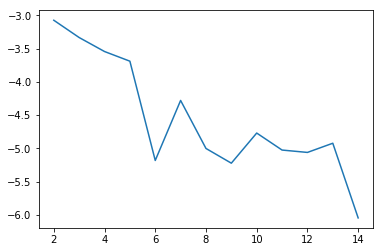

In [13]:
# Create and plot models
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(1) # setting random seed to get the same results each time.
k_range = range(2,15)
scores = []
for k in k_range:
    goodLdaModel = ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=k, passes=75)
    goodcm = CoherenceModel(model=goodLdaModel, corpus=corpus, dictionary=dictionary, coherence='u_mass')
    scores.append(goodcm.get_coherence())
    
plt.figure()
plt.plot(k_range, scores)

In [14]:
# best topic counts
scores 

[-3.0737351503941932,
 -3.3335651947946356,
 -3.5437609598023521,
 -3.689068479122362,
 -5.1811750365045866,
 -4.2790695123046607,
 -5.0006426271535194,
 -5.2218344341578034,
 -4.7690091877351142,
 -5.0245991955698779,
 -5.0601953594008258,
 -4.9220837730137204,
 -6.0445142377167169]

### Setting the number of topics to 13 based on the optimal number of topics per the above

In [73]:
np.random.seed(1) # setting random seed to get the same results each time. 
model = ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=13, passes=75)

In [74]:
model.show_topics()

[(8,
  u'0.041*"bit" + 0.023*"songwrit" + 0.016*"write" + 0.013*"artist" + 0.013*"song" + 0.010*"deal" + 0.010*"guitar" + 0.010*"festiv" + 0.009*"submit" + 0.009*"publish"'),
 (9,
  u'0.013*"beat" + 0.013*"hop" + 0.012*"hip" + 0.012*"featur" + 0.009*"soul" + 0.009*"weekli" + 0.009*"podcast" + 0.007*"check" + 0.007*"electron" + 0.007*"tune"'),
 (5,
  u'0.011*"video" + 0.010*"featur" + 0.009*"road" + 0.009*"kick" + 0.007*"songwrit" + 0.006*"littl" + 0.006*"afternoon" + 0.005*"world" + 0.005*"round" + 0.005*"listen"'),
 (7,
  u'0.025*"album" + 0.017*"free" + 0.016*"itun" + 0.013*"submiss" + 0.012*"remix" + 0.012*"distribut" + 0.011*"babi" + 0.011*"track" + 0.011*"bit" + 0.010*"code"'),
 (12,
  u'0.024*"facebook" + 0.024*"tunecor" + 0.020*"bit" + 0.020*"blog" + 0.019*"fan" + 0.017*"artist" + 0.016*"store" + 0.014*"check" + 0.014*"app" + 0.012*"releas"'),
 (1,
  u'0.175*"soundcloud" + 0.026*"snd" + 0.026*"sound" + 0.025*"listen" + 0.017*"win" + 0.012*"voic" + 0.012*"hear" + 0.012*"audio" + 

In [75]:
gensim.models.coherencemodel.CoherenceModel 

gensim.models.coherencemodel.CoherenceModel

In [76]:
# print words without probability
for i in range(0,6):
    topics = model.show_topic(i, 13)
    print ', '.join([str(word[0]) for word in topics])

sound, record, album, base, track, releas, produc, pop, found, rock, snd, creat, scotd
soundcloud, snd, sound, listen, win, voic, hear, audio, blog, track, contest, join, citi
ticket, acoust, berlin, love, vocal, art, rock, peter, rsvp, kevin, valentin, drum, improv
bit, commun, tip, musician, share, help, check, social, stori, medium, blog, ever, follow
happi, playlist, holiday, weekend, song, video, featur, christma, awesom, friday, game, listen, bit
video, featur, road, kick, songwrit, littl, afternoon, world, round, listen, child, via, artist


In [77]:
lda_corpus = model[corpus]

results = []
for i in lda_corpus:
    print i
    results.append(i)
print 

[(1, 0.68697304), (6, 0.075567171), (7, 0.19899777)]
[(1, 0.27236775), (3, 0.24566485), (9, 0.42279485)]
[(2, 0.29208454), (7, 0.38674152), (12, 0.25124341)]
[(3, 0.6114983), (7, 0.086151578), (8, 0.075735115), (12, 0.20563583)]
[(0, 0.010989154), (1, 0.010989049), (2, 0.010989248), (3, 0.68378675), (4, 0.010989011), (5, 0.010989011), (6, 0.010989035), (7, 0.010989011), (8, 0.010989011), (9, 0.010989361), (10, 0.010989028), (11, 0.010989011), (12, 0.19533333)]
[(0, 0.010989131), (1, 0.010989042), (2, 0.010989012), (3, 0.010989101), (4, 0.010989012), (5, 0.010989042), (6, 0.010989207), (7, 0.010989012), (8, 0.010989051), (9, 0.25065789), (10, 0.010989095), (11, 0.010989146), (12, 0.62846231)]
[(0, 0.20986262), (1, 0.045631446), (3, 0.23206256), (5, 0.034293775), (7, 0.03110444), (8, 0.028138952), (9, 0.27763197), (12, 0.13253286)]
[(0, 0.27035764), (5, 0.040614013), (6, 0.062432282), (7, 0.14787616), (9, 0.39232579), (12, 0.070556812)]
[(0, 0.28271601), (2, 0.027983909), (7, 0.086950704

[(1, 0.074081682), (3, 0.24307291), (12, 0.63156259)]
[(0, 0.68205589), (5, 0.059652504), (6, 0.058360547), (10, 0.087275542), (11, 0.080266528)]
[(3, 0.098450221), (6, 0.23900431), (7, 0.087312482), (9, 0.46241212), (10, 0.071794935)]
[(1, 0.10898928), (4, 0.073592655), (5, 0.58065826), (12, 0.20665909)]
[(0, 0.28415442), (2, 0.016437307), (3, 0.036235709), (4, 0.018623449), (5, 0.018742854), (9, 0.55940646), (10, 0.027817907), (11, 0.032925788)]
[(0, 0.42158327), (2, 0.1690177), (3, 0.36891285)]
[(3, 0.25974387), (7, 0.30384508), (10, 0.059009563), (12, 0.3427856)]
[(3, 0.29015434), (4, 0.28203207), (6, 0.18860455), (9, 0.14776002), (10, 0.072800688)]
[(0, 0.25791612), (2, 0.34798798), (5, 0.10330761), (9, 0.23152529), (10, 0.04644246)]
[(0, 0.16644751), (1, 0.098775223), (9, 0.64090627), (10, 0.057433404)]
[(0, 0.19849285), (1, 0.26236251), (2, 0.042726643), (3, 0.11412034), (4, 0.077201098), (6, 0.086849332), (7, 0.20506023)]
[(0, 0.32660821), (1, 0.15868555), (7, 0.26517627), (10,

[(0, 0.34377587), (4, 0.19189085), (9, 0.096925125), (10, 0.32413867)]
[(3, 0.15767799), (4, 0.25640985), (7, 0.4067508), (12, 0.12146813)]
[(0, 0.64274406), (1, 0.010989011), (2, 0.010989354), (3, 0.23637588), (4, 0.010989063), (5, 0.010989024), (6, 0.010989174), (7, 0.01098907), (8, 0.01098903), (9, 0.010989011), (10, 0.010989061), (11, 0.010989105), (12, 0.01098916)]
[(0, 0.087715611), (3, 0.068602979), (4, 0.078957126), (7, 0.15399884), (9, 0.089790687), (11, 0.48926023)]
[(0, 0.1476942), (1, 0.16348837), (9, 0.40541011), (11, 0.12038238), (12, 0.11906856)]
[(3, 0.089578755), (5, 0.31360948), (10, 0.46745586), (12, 0.076101176)]
[(0, 0.40134823), (1, 0.01282069), (2, 0.012820513), (3, 0.012820513), (4, 0.012820513), (5, 0.012820639), (6, 0.012820649), (7, 0.012820556), (8, 0.012820549), (9, 0.45762548), (10, 0.01282056), (11, 0.012820513), (12, 0.01282062)]
[(9, 0.23668589), (10, 0.6982249)]
[(0, 0.44929546), (3, 0.21794894), (6, 0.060008753), (9, 0.16538318), (10, 0.078059413)]
[(

[(0, 0.12869932), (1, 0.084896415), (2, 0.44380027), (5, 0.30187926)]
[(2, 0.64942509), (7, 0.092432722), (8, 0.1989703)]
[(0, 0.28909802), (1, 0.097097889), (3, 0.39339307), (5, 0.08278396), (9, 0.061027352), (12, 0.055061128)]
[(1, 0.5583483), (2, 0.06334839), (9, 0.20275535), (10, 0.13482362)]
[(0, 0.27422145), (11, 0.1654074), (12, 0.49626818)]
[(0, 0.10769229), (1, 0.1076922), (10, 0.70769215)]
[(0, 0.16331318), (4, 0.07692311), (7, 0.62609643), (9, 0.084216349)]
[(0, 0.019230951), (1, 0.01923077), (2, 0.01923077), (3, 0.76922995), (4, 0.01923077), (5, 0.019231418), (6, 0.01923077), (7, 0.01923077), (8, 0.01923077), (9, 0.01923077), (10, 0.01923077), (11, 0.01923077), (12, 0.01923077)]
[(0, 0.71262431), (12, 0.19335812)]
[(3, 0.14856072), (6, 0.1083542), (9, 0.69783586)]
[(10, 0.89743495)]
[(0, 0.52148485), (1, 0.10995812), (2, 0.12168419), (3, 0.08881738), (8, 0.069638595), (11, 0.060076632)]
[(7, 0.17010766), (8, 0.69235951), (12, 0.092283741)]
[(0, 0.30989331), (2, 0.2418438), 

[(0, 0.62151468), (3, 0.28446802)]
[(0, 0.20960572), (2, 0.65349633), (8, 0.081952408)]
[(0, 0.51282007), (1, 0.012821122), (2, 0.012820513), (3, 0.012820513), (4, 0.012820513), (5, 0.34615287), (6, 0.012820523), (7, 0.012820513), (8, 0.012820615), (9, 0.012820876), (10, 0.012820513), (11, 0.012820668), (12, 0.012820666)]
[(1, 0.14660038), (2, 0.60092163), (3, 0.17555428)]
[(0, 0.3253229), (7, 0.58065957)]
[(0, 0.11965814), (5, 0.11965808), (11, 0.6752131)]
[(8, 0.12077279), (9, 0.41232127), (11, 0.39697531)]
[(0, 0.32127547), (3, 0.034227785), (5, 0.015714981), (6, 0.28385597), (9, 0.33759969)]
[(0, 0.36786228), (9, 0.56162459)]
[(0, 0.55568987), (2, 0.29936007), (5, 0.085778125)]
[(7, 0.89743531)]
[(0, 0.22781099), (3, 0.46801713), (12, 0.23424102)]
[(0, 0.010989184), (1, 0.010989021), (2, 0.010989063), (3, 0.010989281), (4, 0.010989035), (5, 0.01098907), (6, 0.010989084), (7, 0.1697706), (8, 0.70934922), (9, 0.010989216), (10, 0.010989011), (11, 0.010989067), (12, 0.010989117)]
[(0,

[(0, 0.33144698), (2, 0.031946085), (4, 0.036092132), (5, 0.047339872), (7, 0.11718237), (9, 0.32902434), (11, 0.099975131)]
[(0, 0.36311802), (1, 0.010989077), (2, 0.01098901), (3, 0.22743684), (4, 0.01098901), (5, 0.010989347), (6, 0.010989127), (7, 0.01098914), (8, 0.29955411), (9, 0.010989122), (10, 0.010989054), (11, 0.010989018), (12, 0.010989115)]
[(0, 0.11646602), (5, 0.13538347), (6, 0.18126906), (9, 0.50918895)]
[(0, 0.12399789), (9, 0.78198445)]
[(0, 0.4718608), (4, 0.11974718), (5, 0.11753298), (11, 0.22162774)]
[(5, 0.11965832), (10, 0.78632444)]
[(0, 0.30849701), (3, 0.13138072), (6, 0.17639937), (8, 0.31449181)]
[(2, 0.27899331), (11, 0.63639033)]
[(0, 0.085052997), (7, 0.63081896), (8, 0.063348457), (9, 0.12123224), (11, 0.063348182)]
[(2, 0.20303999), (5, 0.076922275), (9, 0.1456829), (11, 0.5249036)]
[(0, 0.096235439), (6, 0.74215019), (11, 0.10666908)]
[(0, 0.010989011), (1, 0.15384611), (2, 0.010989225), (3, 0.010989011), (4, 0.15384626), (5, 0.010989011), (6, 0.010

[(0, 0.43956119), (1, 0.010989124), (2, 0.15384665), (3, 0.010989011), (4, 0.010989011), (5, 0.010989011), (6, 0.010989011), (7, 0.010989011), (8, 0.010989011), (9, 0.010989011), (10, 0.010989011), (11, 0.29670191), (12, 0.010989011)]
[(8, 0.73923469), (9, 0.16338649), (12, 0.067792781)]
[(5, 0.20164993), (8, 0.72783685)]
[(0, 0.2713615), (5, 0.64402241)]
[(2, 0.46824375), (3, 0.13782869), (9, 0.29777327)]
[(0, 0.10036574), (2, 0.17373909), (3, 0.2072991), (9, 0.41454309), (10, 0.067853414)]
[(3, 0.63242441), (7, 0.1303958), (9, 0.17307663)]
[(9, 0.45299178), (10, 0.45299059)]
[(1, 0.1764102), (7, 0.2912102), (8, 0.13428539), (9, 0.34483925)]
[(0, 0.70489794), (4, 0.11048575), (5, 0.10769222)]
[(0, 0.29649392), (5, 0.41994935), (7, 0.092253752), (9, 0.1451489)]
[(1, 0.28965563), (3, 0.10584962), (6, 0.14558108), (9, 0.40565866)]
[(0, 0.29161516), (3, 0.31280053), (4, 0.074075408), (6, 0.029345084), (7, 0.16488369), (9, 0.11692504)]
[(0, 0.16173585), (3, 0.1486191), (4, 0.48014829), (5,

[(3, 0.26127586), (5, 0.082434423), (6, 0.49560258), (9, 0.11453298)]
[(0, 0.19882323), (4, 0.10571999), (6, 0.14420907), (10, 0.48830998)]
[(0, 0.20828883), (3, 0.044246763), (4, 0.1000446), (7, 0.090949394), (9, 0.43400788), (11, 0.053450257), (12, 0.051260758)]
[(7, 0.1310735), (9, 0.81915253)]
[(0, 0.10172694), (7, 0.39872503), (8, 0.094421148), (9, 0.35187206)]
[(0, 0.13197178), (1, 0.097901843), (2, 0.097902246), (3, 0.32479393), (8, 0.10116034), (10, 0.19731869)]
[(0, 0.09202344), (1, 0.17307581), (2, 0.13195331), (3, 0.44801375), (11, 0.10365125)]
[(0, 0.087002575), (5, 0.6943745), (7, 0.16367769)]
[(0, 0.025641026), (1, 0.025641026), (2, 0.025641026), (3, 0.35897437), (4, 0.025641026), (5, 0.025641026), (6, 0.025641026), (7, 0.025641026), (8, 0.025641026), (9, 0.025641026), (10, 0.35897434), (11, 0.025641026), (12, 0.025641026)]
[(0, 0.14011836), (2, 0.17398694), (3, 0.48467076), (9, 0.12430028)]
[(0, 0.18353222), (1, 0.14835164), (5, 0.54174358), (9, 0.076921664)]
[(0, 0.6156

[(6, 0.23712111), (7, 0.54518706), (12, 0.16274655)]
[(0, 0.01538482), (1, 0.015384691), (2, 0.015384714), (3, 0.51360118), (4, 0.015384616), (5, 0.015384616), (6, 0.015384665), (7, 0.015384616), (8, 0.015384669), (9, 0.015385014), (10, 0.015384616), (11, 0.015384616), (12, 0.31716719)]
[(12, 0.92899364)]
[(0, 0.74296623), (8, 0.036763828), (9, 0.096716441), (10, 0.036108889), (12, 0.068796366)]
[(0, 0.19568279), (1, 0.082774751), (2, 0.039430264), (3, 0.034238886), (6, 0.1460795), (9, 0.29678023), (10, 0.1928677)]
[(0, 0.18055263), (2, 0.05721087), (3, 0.068427913), (5, 0.02350086), (6, 0.09116593), (8, 0.049040083), (9, 0.43677577), (10, 0.063799664), (12, 0.023372291)]
[(0, 0.15295552), (4, 0.041771654), (6, 0.15833436), (7, 0.036371909), (8, 0.15703009), (9, 0.41501495), (12, 0.028701399)]
[(0, 0.48206496), (3, 0.041768845), (4, 0.056013241), (5, 0.067903645), (8, 0.10237105), (9, 0.23674491)]
[(0, 0.15716423), (2, 0.025139468), (3, 0.074795999), (4, 0.028343787), (5, 0.3105993), (

[(1, 0.39155167), (9, 0.18881148), (11, 0.34970614)]
[(11, 0.43874767), (12, 0.45548272)]
[(1, 0.69295609), (6, 0.10496847), (11, 0.14290366)]
[(1, 0.68721342), (7, 0.11068662), (12, 0.13216938)]
[(11, 0.75931621), (12, 0.1466665)]
[(3, 0.088890672), (4, 0.22216915), (6, 0.10840851), (9, 0.09343183), (10, 0.4431431)]
[(11, 0.59027195), (12, 0.31571081)]
[(12, 0.91608387)]
[(1, 0.6185059), (7, 0.19738348), (12, 0.1200077)]
[(12, 0.91608387)]
[(0, 0.093961328), (1, 0.17766841), (11, 0.66426748)]
[(1, 0.69294935), (6, 0.1049602), (11, 0.14291865)]
[(0, 0.097442918), (1, 0.30133954), (6, 0.27871448), (7, 0.17717433), (12, 0.097991124)]
[(0, 0.18386616), (11, 0.74562025)]
[(0, 0.097433992), (1, 0.30123815), (6, 0.27879798), (7, 0.17720519), (12, 0.097987063)]
[(5, 0.71320802), (11, 0.23390685)]
[(4, 0.10004628), (6, 0.12917285), (10, 0.64391786), (11, 0.069170386)]
[(6, 0.34051356), (7, 0.20691989), (8, 0.092182629), (11, 0.30269125)]
[(12, 0.92307687)]
[(0, 0.089743719), (1, 0.50640875), (

[(5, 0.74081612), (7, 0.15341425)]
[(8, 0.67521286), (10, 0.23076874)]
[(0, 0.012820846), (1, 0.012820513), (2, 0.012820513), (3, 0.012820513), (4, 0.012820628), (5, 0.012820513), (6, 0.012820571), (7, 0.01282052), (8, 0.012820513), (9, 0.012820513), (10, 0.51281983), (11, 0.012820513), (12, 0.34615406)]
[(3, 0.25167447), (6, 0.2546865), (7, 0.25069147), (8, 0.17371641)]
[(1, 0.17893319), (6, 0.45289809), (8, 0.27201456)]
[(1, 0.17876154), (6, 0.45301583), (8, 0.27206847)]
[(1, 0.47684312), (5, 0.14086671), (11, 0.28613594)]
[(0, 0.015384773), (1, 0.015384967), (2, 0.015384616), (3, 0.015384912), (4, 0.21538436), (5, 0.015384616), (6, 0.01538481), (7, 0.015384731), (8, 0.41538423), (9, 0.015384664), (10, 0.015384736), (11, 0.015384795), (12, 0.21538374)]
[(2, 0.076717876), (3, 0.28517264), (4, 0.10610739), (7, 0.24300267), (8, 0.15366752), (12, 0.11192033)]
[(7, 0.078712255), (8, 0.13284168), (10, 0.040613718), (11, 0.61150146), (12, 0.11353854)]
[(0, 0.012820565), (1, 0.20995925), (2,

[(6, 0.61987484), (10, 0.14460991), (11, 0.1714123)]
[(0, 0.52236539), (1, 0.015384649), (2, 0.015384616), (3, 0.30840343), (4, 0.015384637), (5, 0.015384616), (6, 0.015384664), (7, 0.015384642), (8, 0.015384694), (9, 0.015384672), (10, 0.015384616), (11, 0.015384644), (12, 0.015384709)]
[(0, 0.2590344), (1, 0.070308335), (3, 0.20072897), (7, 0.22930832), (10, 0.070382468), (12, 0.1385631)]
[(1, 0.08689753), (3, 0.33154774), (11, 0.32045934), (12, 0.22812812)]
[(6, 0.44731843), (8, 0.29394099), (10, 0.097900957), (12, 0.097902246)]
[(0, 0.19219764), (1, 0.056293517), (6, 0.060114361), (7, 0.37746659), (11, 0.1229334), (12, 0.16758294)]
[(0, 0.12670791), (4, 0.037142791), (7, 0.46529958), (11, 0.16768463), (12, 0.18393423)]
[(3, 0.11726071), (7, 0.33474869), (11, 0.24482217), (12, 0.23393738)]
[(0, 0.019230856), (1, 0.01923077), (2, 0.01923077), (3, 0.51923066), (4, 0.01923077), (5, 0.019230798), (6, 0.01923077), (7, 0.01923077), (8, 0.01923077), (9, 0.01923077), (10, 0.26923078), (11, 

[(0, 0.010989085), (1, 0.501333), (2, 0.010989067), (3, 0.010989251), (4, 0.010989355), (5, 0.010989061), (6, 0.010989124), (7, 0.010989212), (8, 0.010989315), (9, 0.010989011), (10, 0.010989049), (11, 0.3777864), (12, 0.01098909)]
[(0, 0.010989036), (1, 0.010989345), (2, 0.010989012), (3, 0.16329803), (4, 0.010989034), (5, 0.010989022), (6, 0.010989201), (7, 0.010989049), (8, 0.010989141), (9, 0.010989013), (10, 0.010989039), (11, 0.71582204), (12, 0.010989049)]
[(0, 0.34752125), (6, 0.23898049), (12, 0.33657467)]
[(0, 0.051580284), (3, 0.38721305), (11, 0.26882473), (12, 0.26091334)]
[(0, 0.010989078), (1, 0.010989033), (2, 0.2313785), (3, 0.010989071), (4, 0.010989084), (5, 0.010989028), (6, 0.010989085), (7, 0.010989015), (8, 0.010989076), (9, 0.010989044), (10, 0.010989097), (11, 0.36785564), (12, 0.29087529)]
[(1, 0.13585576), (3, 0.42040169), (10, 0.12510996), (11, 0.24170902)]
[(0, 0.23318371), (7, 0.23958053), (9, 0.16199824), (11, 0.11383656), (12, 0.20406283)]
[(2, 0.0748443

[(0, 0.040097211), (3, 0.16131394), (4, 0.41594365), (6, 0.056662589), (7, 0.095118232), (9, 0.048075777), (11, 0.13283619), (12, 0.039830938)]
[(6, 0.12612396), (7, 0.11087683), (11, 0.58517385), (12, 0.12457068)]
[(1, 0.12590757), (3, 0.058561735), (4, 0.10652924), (6, 0.48226619), (7, 0.087662123), (11, 0.066914201), (12, 0.055064853)]
[(0, 0.10055272), (2, 0.034981374), (4, 0.37054211), (5, 0.23631585), (7, 0.073088109), (9, 0.11845978), (12, 0.051171545)]
[(5, 0.13955167), (7, 0.37623423), (11, 0.42011106)]
[(0, 0.062352188), (4, 0.32947099), (5, 0.099711709), (8, 0.1241224), (9, 0.047234666), (11, 0.26803273), (12, 0.055089172)]
[(7, 0.098797299), (11, 0.61196345), (12, 0.23429397)]
[(3, 0.2669397), (5, 0.041420095), (7, 0.2408441), (8, 0.15303639), (10, 0.062886149), (11, 0.068010941), (12, 0.14911093)]
[(0, 0.36674741), (5, 0.052304581), (11, 0.55245769)]
[(3, 0.30196971), (4, 0.15978916), (6, 0.28843242), (7, 0.075431153), (11, 0.057461858), (12, 0.089992516)]
[(1, 0.16524647)

[(1, 0.584342), (9, 0.1740583), (11, 0.1824272)]
[(3, 0.49681073), (6, 0.26425713), (9, 0.081609175), (11, 0.11405359)]
[(3, 0.072231457), (4, 0.26804915), (5, 0.3847878), (7, 0.070363678), (11, 0.17037959)]
[(7, 0.2946721), (8, 0.2340771), (11, 0.42600158)]
[(0, 0.20443358), (1, 0.11478079), (6, 0.197531), (7, 0.1625302), (9, 0.11024257), (11, 0.11667814), (12, 0.070726655)]
[(0, 0.082450792), (3, 0.1499261), (6, 0.27869919), (7, 0.11175617), (11, 0.2435561), (12, 0.11117536)]
[(0, 0.20799024), (4, 0.087319888), (8, 0.35680717), (9, 0.25386521), (10, 0.059829108)]
[(3, 0.075506285), (5, 0.40245947), (7, 0.13097875), (9, 0.079740576), (11, 0.27511534)]
[(0, 0.067201786), (3, 0.081253514), (4, 0.60419238), (7, 0.087946124), (9, 0.13479051)]
[(3, 0.26309049), (6, 0.35270476), (7, 0.069058836), (9, 0.06952142), (12, 0.20716271)]
[(0, 0.16238868), (3, 0.46322784), (10, 0.16602284), (11, 0.12182178)]
[(0, 0.18884747), (5, 0.19334123), (6, 0.10616651), (7, 0.33796757), (11, 0.14570484)]
[(1,

[(0, 0.25188679), (2, 0.050052963), (5, 0.38944504), (7, 0.099994607), (11, 0.18064842)]
[(8, 0.52578932), (11, 0.43574879)]
[(1, 0.081221037), (2, 0.095892921), (5, 0.35771322), (7, 0.052138809), (8, 0.085966282), (11, 0.30552915)]
[(0, 0.26654407), (1, 0.084889479), (3, 0.10505246), (7, 0.49406305)]
[(1, 0.075416088), (7, 0.38681769), (11, 0.23172639), (12, 0.26531553)]
[(1, 0.17656744), (7, 0.48464465), (11, 0.18749297), (12, 0.11832772)]
[(0, 0.064441226), (2, 0.10105005), (4, 0.13800699), (6, 0.370801), (11, 0.2353867), (12, 0.065838285)]
[(0, 0.10760615), (3, 0.26873606), (4, 0.033653811), (6, 0.14147609), (11, 0.42929694)]
[(1, 0.078286827), (6, 0.3919552), (7, 0.18474475), (11, 0.31616658)]
[(1, 0.12322203), (2, 0.09897735), (4, 0.063772485), (5, 0.57548177), (9, 0.054581471), (11, 0.060553327)]
[(5, 0.19391344), (7, 0.24958032), (8, 0.084076844), (11, 0.42627525)]
[(0, 0.17492594), (3, 0.13518223), (4, 0.062915564), (5, 0.22618788), (7, 0.31506497), (11, 0.05738299)]
[(0, 0.41

[(3, 0.69526011), (11, 0.17427847), (12, 0.085212387)]
[(3, 0.24412997), (6, 0.19722551), (8, 0.09606389), (11, 0.40932596)]
[(0, 0.24465272), (3, 0.08950559), (5, 0.14927058), (7, 0.053471167), (10, 0.20551527), (11, 0.23194343)]
[(0, 0.1100968), (4, 0.24465786), (7, 0.29181442), (11, 0.32196203)]
[(0, 0.44030443), (5, 0.10650181), (6, 0.29837298), (9, 0.12472017)]
[(1, 0.076498143), (2, 0.21006376), (3, 0.10956366), (5, 0.083777286), (7, 0.223166), (9, 0.10813276), (11, 0.17390984)]
[(5, 0.21332678), (8, 0.70381546), (11, 0.050806258)]
[(1, 0.11541191), (3, 0.46852669), (11, 0.28239712), (12, 0.092939973)]
[(7, 0.19829501), (11, 0.69593537)]
[(0, 0.32248864), (1, 0.3004978), (4, 0.16082425), (9, 0.166738)]
[(2, 0.076032721), (4, 0.20772986), (8, 0.31477582), (11, 0.35530758)]
[(0, 0.51923001), (1, 0.019230928), (2, 0.2692306), (3, 0.019230938), (4, 0.0192309), (5, 0.01923077), (6, 0.01923077), (7, 0.01923077), (8, 0.01923077), (9, 0.01923077), (10, 0.019230817), (11, 0.01923077), (12

[(4, 0.10239371), (10, 0.60669076), (11, 0.22681236)]
[(6, 0.13239865), (7, 0.60123324), (8, 0.21508576)]
[(1, 0.055775888), (3, 0.061351888), (4, 0.15994543), (5, 0.1051865), (8, 0.06926395), (10, 0.056722503), (11, 0.46867681)]
[(1, 0.081428811), (3, 0.18886949), (4, 0.52147365), (8, 0.085293762), (12, 0.081908301)]
[(2, 0.12980771), (8, 0.48366377), (11, 0.19572717), (12, 0.14753175)]
[(0, 0.1719339), (8, 0.70498902), (9, 0.071794845)]
[(3, 0.4654507), (8, 0.44053167)]
[(7, 0.1010987), (8, 0.10649972), (9, 0.28516623), (11, 0.44429809)]
[(0, 0.067307606), (2, 0.35065845), (7, 0.11729571), (11, 0.4214685)]
[(0, 0.15384598), (1, 0.010989276), (2, 0.010989011), (3, 0.010989181), (4, 0.72527361), (5, 0.010989011), (6, 0.010989239), (7, 0.010989083), (8, 0.010989274), (9, 0.010989011), (10, 0.010989094), (11, 0.01098908), (12, 0.010989142)]
[(4, 0.072623931), (6, 0.61248314), (8, 0.27826256)]
[(1, 0.4430674), (4, 0.079140939), (8, 0.15708275), (10, 0.27125791)]
[(1, 0.22429958), (3, 0.30

[(1, 0.38069373), (4, 0.18421803), (5, 0.087328672), (8, 0.29450467)]
[(7, 0.18353492), (8, 0.63205642), (11, 0.12030544)]
[(7, 0.18970527), (12, 0.73337114)]
[(4, 0.2162407), (6, 0.26053181), (12, 0.47194499)]
[(1, 0.10662833), (3, 0.22822195), (5, 0.17307706), (12, 0.43438017)]
[(1, 0.091402158), (3, 0.13507117), (9, 0.082839765), (10, 0.34004021), (12, 0.30330926)]
[(0, 0.16125448), (1, 0.24050577), (2, 0.010989011), (3, 0.010989181), (4, 0.010989028), (5, 0.010989011), (6, 0.010989165), (7, 0.010989039), (8, 0.23862784), (9, 0.010989011), (10, 0.010989075), (11, 0.01098903), (12, 0.26071039)]
[(0, 0.078842022), (3, 0.78809232), (11, 0.078120328)]
[(7, 0.52191001), (8, 0.18622912), (11, 0.20638961)]
[(10, 0.09018603), (11, 0.37135145), (12, 0.48351672)]
[(1, 0.12702952), (4, 0.36557531), (6, 0.43746462)]
[(3, 0.12086577), (5, 0.080322139), (6, 0.74386674)]
[(6, 0.67433327), (7, 0.26057762)]
[(3, 0.60370243), (7, 0.29052764)]
[(2, 0.27046016), (3, 0.37982479), (8, 0.1873405), (12, 0.

[(4, 0.8076036), (7, 0.12188318)]
[(0, 0.015384616), (1, 0.015384631), (2, 0.015384616), (3, 0.015385036), (4, 0.015384635), (5, 0.21538457), (6, 0.015384862), (7, 0.015384646), (8, 0.61538363), (9, 0.015384616), (10, 0.015384858), (11, 0.015384635), (12, 0.015384671)]
[(1, 0.28136092), (7, 0.29649904), (8, 0.097164907), (9, 0.08770512), (11, 0.20650046)]
[(0, 0.25879738), (4, 0.12307772), (6, 0.21218669), (8, 0.32901478)]
[(2, 0.46745566), (8, 0.13090868), (10, 0.3424637)]
[(0, 0.23021628), (6, 0.33358458), (8, 0.22356354), (9, 0.07364729), (12, 0.10278886)]
[(3, 0.25458869), (5, 0.084592454), (6, 0.60587364)]
[(7, 0.75906503), (10, 0.08825957), (12, 0.093503609)]
[(0, 0.14804341), (3, 0.3495338), (4, 0.14238974), (6, 0.14443304), (8, 0.16826226)]
[(4, 0.29896823), (5, 0.076923028), (8, 0.33699292), (10, 0.15497696), (12, 0.088182293)]
[(3, 0.47721994), (6, 0.2063497), (11, 0.24649955)]
[(0, 0.36584371), (5, 0.060475539), (7, 0.4056938), (12, 0.12952502)]
[(4, 0.27555165), (6, 0.33461

[(5, 0.16408986), (6, 0.37678176), (8, 0.13089898), (9, 0.043603253), (11, 0.25385672)]
[(8, 0.74231625), (11, 0.16366629)]
[(0, 0.010989011), (1, 0.010989018), (2, 0.010989011), (3, 0.010989048), (4, 0.01098902), (5, 0.010989015), (6, 0.86813158), (7, 0.010989064), (8, 0.010989086), (9, 0.010989013), (10, 0.010989027), (11, 0.010989039), (12, 0.010989058)]
[(1, 0.5117029), (4, 0.091210522), (12, 0.34580389)]
[(3, 0.072778761), (4, 0.22394058), (6, 0.18205647), (11, 0.48276234)]
[(0, 0.15356031), (3, 0.27901378), (7, 0.13451056), (8, 0.35599184)]
[(2, 0.11965796), (3, 0.30042008), (4, 0.1401033), (11, 0.36289501)]
[(0, 0.012820526), (1, 0.20739384), (2, 0.012820513), (3, 0.012820777), (4, 0.01282055), (5, 0.012820513), (6, 0.41315034), (7, 0.012820574), (8, 0.012820649), (9, 0.012820513), (10, 0.012820568), (11, 0.25125006), (12, 0.012820602)]
[(8, 0.60874897), (9, 0.104193), (11, 0.10454898), (12, 0.12925428)]
[(1, 0.2484425), (3, 0.57983714), (9, 0.10178962)]
[(0, 0.23406015), (6, 0.

[(6, 0.11489163), (7, 0.37128752), (11, 0.16261692), (12, 0.28197315)]
[(7, 0.14454475), (12, 0.74968529)]
[(6, 0.4984315), (7, 0.10203695), (11, 0.32960114)]
[(1, 0.10564345), (2, 0.092637785), (3, 0.10110619), (6, 0.27233884), (7, 0.3030977), (11, 0.080303989)]
[(0, 0.010989071), (1, 0.010989011), (2, 0.010989011), (3, 0.54988319), (4, 0.010989087), (5, 0.010989088), (6, 0.010989109), (7, 0.010989035), (8, 0.010989011), (9, 0.010989097), (10, 0.15384604), (11, 0.18638019), (12, 0.010989054)]
[(0, 0.038461536), (1, 0.038461536), (2, 0.038461536), (3, 0.038461536), (4, 0.038461536), (5, 0.038461536), (6, 0.038461536), (7, 0.038462732), (8, 0.5384596), (9, 0.038461536), (10, 0.038461536), (11, 0.038462024), (12, 0.038461801)]
[(6, 0.55263335), (11, 0.36275092)]
[(6, 0.2307694), (8, 0.3418799), (12, 0.34188023)]
[(1, 0.56925702), (3, 0.37030312)]
[(5, 0.25388086), (11, 0.3514725), (12, 0.3519114)]
[(0, 0.012820527), (1, 0.012820549), (2, 0.012820513), (3, 0.012820822), (4, 0.012820541), 

[(0, 0.68746006), (6, 0.24745044)]
[(7, 0.55802351), (10, 0.33620638)]
[(5, 0.38451186), (6, 0.18676855), (7, 0.24673073), (9, 0.11275785)]
[(2, 0.34792066), (7, 0.55806154)]
[(0, 0.57202852), (6, 0.24335554), (11, 0.10769238)]
[(0, 0.076922826), (4, 0.079566322), (7, 0.19275932), (8, 0.46437722), (12, 0.14241792)]
[(7, 0.22788747), (8, 0.17646475), (12, 0.49949369)]
[(10, 0.31951338), (12, 0.59587055)]
[(6, 0.14521359), (7, 0.41464621), (9, 0.35466981)]
[(4, 0.10899032), (6, 0.70639402), (9, 0.1076923)]
[(2, 0.15976244), (3, 0.20508306), (6, 0.26258582), (7, 0.089426011), (8, 0.23580514)]
[(10, 0.33581853), (11, 0.19511382), (12, 0.41412228)]
[(1, 0.080442995), (10, 0.46150747), (12, 0.39394635)]
[(3, 0.5816921), (6, 0.31253824)]
[(3, 0.1072791), (7, 0.21093185), (8, 0.61185843)]
[(2, 0.25720087), (6, 0.41397169), (7, 0.26472458)]
[(0, 0.31773585), (3, 0.3887243), (6, 0.22360949)]
[(2, 0.077091016), (3, 0.15622975), (6, 0.33004248), (7, 0.079831049), (8, 0.3128494)]
[(4, 0.16166964), 

[(0, 0.19780476), (3, 0.091695376), (4, 0.1160561), (5, 0.13273937), (6, 0.27068219), (8, 0.14207083)]
[(3, 0.10343492), (4, 0.071794882), (6, 0.080371059), (9, 0.20551109), (11, 0.49786204)]
[(0, 0.010989093), (1, 0.010989011), (2, 0.010989027), (3, 0.010989011), (4, 0.18505716), (5, 0.010989093), (6, 0.010989152), (7, 0.010989103), (8, 0.47499028), (9, 0.010989108), (10, 0.010989011), (11, 0.010989062), (12, 0.2300619)]
[(10, 0.51797473), (12, 0.37625551)]
[(5, 0.67318672), (6, 0.23279555)]
[(10, 0.69480318), (12, 0.22058003)]
[(3, 0.21645485), (4, 0.10093953), (5, 0.098778434), (6, 0.52089)]
[(0, 0.012820639), (1, 0.012820513), (2, 0.012820519), (3, 0.51282007), (4, 0.012820583), (5, 0.012820513), (6, 0.012820798), (7, 0.012820632), (8, 0.012820557), (9, 0.012820574), (10, 0.01282061), (11, 0.012820513), (12, 0.3461535)]
[(3, 0.07856214), (5, 0.15054637), (6, 0.11103509), (8, 0.61040568)]
[(3, 0.60590583), (7, 0.22017464), (10, 0.10398935)]
[(6, 0.12571563), (8, 0.13321069), (10, 0.

[(0, 0.025641028), (1, 0.025641028), (2, 0.025641028), (3, 0.6923058), (4, 0.025641441), (5, 0.025641188), (6, 0.025641028), (7, 0.025641154), (8, 0.025641028), (9, 0.02564111), (10, 0.025641028), (11, 0.025641028), (12, 0.025642164)]
[(9, 0.40757066), (12, 0.49841103)]
[(1, 0.10769206), (9, 0.30769217), (10, 0.11180867), (12, 0.40357503)]
[(4, 0.35265717), (6, 0.30239382), (8, 0.16539212), (12, 0.13340259)]
[(0, 0.41538438), (1, 0.01538479), (2, 0.2153846), (3, 0.21538453), (4, 0.015384657), (5, 0.015384616), (6, 0.015384616), (7, 0.015384616), (8, 0.015384674), (9, 0.015384616), (10, 0.015384616), (11, 0.015384616), (12, 0.015384616)]
[(4, 0.25984773), (12, 0.64613408)]
[(0, 0.012820631), (1, 0.012820532), (2, 0.012820514), (3, 0.012820628), (4, 0.012820514), (5, 0.012820518), (6, 0.8461526), (7, 0.012820646), (8, 0.012820866), (9, 0.012820611), (10, 0.012820528), (11, 0.012820682), (12, 0.012820749)]
[(3, 0.35984725), (8, 0.19891705), (12, 0.34508136)]
[(0, 0.025641024), (1, 0.02564

[(2, 0.35795274), (5, 0.086462185), (8, 0.095573626), (9, 0.42854267)]
[(5, 0.51326168), (8, 0.10769217), (9, 0.30212265)]
[(3, 0.26467469), (7, 0.069323145), (12, 0.6232664)]
[(0, 0.010989011), (1, 0.010989011), (2, 0.010989016), (3, 0.010989011), (4, 0.17062269), (5, 0.010989011), (6, 0.010989259), (7, 0.54316324), (8, 0.17632343), (9, 0.010989011), (10, 0.010989043), (11, 0.010989011), (12, 0.010989221)]
[(1, 0.18158698), (4, 0.085002005), (5, 0.14140771), (7, 0.11077202), (8, 0.14910878), (10, 0.14882974), (12, 0.16231349)]
[(7, 0.1094465), (8, 0.30297357), (9, 0.10825015), (12, 0.42163727)]
[(3, 0.33999982), (7, 0.15749536), (8, 0.13461551), (10, 0.28135008)]
[(2, 0.43239143), (3, 0.19290164), (4, 0.053185042), (5, 0.13498025), (8, 0.043077003), (10, 0.050629295), (12, 0.074373759)]
[(7, 0.89743543)]
[(0, 0.17661944), (1, 0.082581766), (3, 0.087761357), (8, 0.19280826), (9, 0.29751647), (10, 0.13437241)]
[(0, 0.2844843), (6, 0.15651216), (7, 0.11443591), (8, 0.38162968)]
[(2, 0.12

[(1, 0.079005115), (6, 0.42388487), (7, 0.29225454), (10, 0.07264819), (11, 0.091181375)]
[(3, 0.55084932), (6, 0.36453503)]
[(6, 0.0758968), (8, 0.35038358), (9, 0.33457193), (11, 0.13302267), (12, 0.073735818)]
[(7, 0.30371383), (8, 0.11191409), (12, 0.51444167)]
[(7, 0.31824195), (10, 0.1104239), (12, 0.49441066)]
[(0, 0.15976344), (2, 0.084445551), (5, 0.086961471), (8, 0.29073995), (9, 0.082840197), (11, 0.25382879)]
[(1, 0.068238989), (2, 0.32948491), (6, 0.29092526), (10, 0.15720001), (11, 0.1156887)]
[(2, 0.13428998), (3, 0.12872623), (6, 0.10836311), (8, 0.093676463), (9, 0.45499828), (11, 0.058407348)]
[(3, 0.15596101), (6, 0.34853318), (7, 0.090409674), (8, 0.13388707), (9, 0.22387169)]
[(0, 0.53846008), (1, 0.03846154), (2, 0.038461901), (3, 0.03846154), (4, 0.03846154), (5, 0.038461927), (6, 0.038461603), (7, 0.03846154), (8, 0.03846154), (9, 0.038462166), (10, 0.03846154), (11, 0.03846154), (12, 0.03846154)]
[(1, 0.12721995), (3, 0.15713912), (7, 0.32490778), (11, 0.12280

[(3, 0.094504595), (7, 0.70983833), (8, 0.13648498)]
[(0, 0.053344604), (4, 0.097811475), (5, 0.61463034), (6, 0.11796076), (9, 0.092583895)]
[(3, 0.5508095), (6, 0.36457485)]
[(3, 0.52395451), (7, 0.0897552), (10, 0.33134481)]
[(3, 0.75242484), (10, 0.14180568)]
[(0, 0.22297037), (4, 0.058324598), (5, 0.057213619), (7, 0.081606492), (8, 0.13180505), (9, 0.27896574), (10, 0.15136248)]
[(3, 0.10325006), (7, 0.67432714), (8, 0.15831973)]
[(1, 0.31468102), (7, 0.49929747), (12, 0.13473919)]
[(3, 0.55225003), (8, 0.29532501), (10, 0.097479403)]
[(3, 0.1056314), (7, 0.43658093), (8, 0.38785708)]
[(3, 0.15390882), (6, 0.15768383), (8, 0.091361538), (9, 0.57041836)]
[(3, 0.55080789), (6, 0.36457649)]
[(3, 0.35956106), (6, 0.36499181), (10, 0.2055167)]
[(3, 0.24268311), (6, 0.21750832), (10, 0.18680383), (11, 0.29531205)]
[(3, 0.096593581), (7, 0.49571899), (8, 0.34358439)]
[(0, 0.042242885), (3, 0.060110074), (4, 0.038316194), (5, 0.4319402), (7, 0.076016568), (8, 0.067649059), (9, 0.1625018)

[(0, 0.14964893), (4, 0.33783725), (5, 0.031543616), (6, 0.33233055), (9, 0.10381796), (10, 0.031014876)]
[(2, 0.20769887), (11, 0.71537733)]
[(6, 0.40370798), (7, 0.37278458), (11, 0.16433552)]
[(1, 0.31726134), (3, 0.17812711), (8, 0.11869472), (12, 0.32297951)]
[(1, 0.19801222), (5, 0.07785432), (6, 0.27869871), (7, 0.3959839)]
[(0, 0.088028707), (6, 0.33334732), (8, 0.13168682), (9, 0.31711179), (12, 0.085869171)]
[(0, 0.17515266), (7, 0.27379787), (10, 0.15493508), (12, 0.37447941)]
[(2, 0.062328678), (4, 0.05531374), (5, 0.25647831), (8, 0.1094091), (9, 0.45036605), (10, 0.046160989)]
[(6, 0.15065086), (7, 0.53479218), (10, 0.075479522), (11, 0.052795839), (12, 0.16576871)]
[(4, 0.19259346), (8, 0.56312507), (9, 0.18017846)]
[(0, 0.066791505), (3, 0.043802485), (5, 0.045097962), (6, 0.23796149), (9, 0.54437029), (10, 0.042033114)]
[(6, 0.17493328), (7, 0.17250875), (8, 0.079957955), (9, 0.35266051), (12, 0.19627064)]
[(3, 0.096201509), (7, 0.79446965), (10, 0.04022691), (11, 0.04

[(6, 0.2819387), (8, 0.45837942), (11, 0.20839967)]
[(7, 0.84249276), (9, 0.06055354), (10, 0.058491915)]
[(1, 0.089486688), (6, 0.59340209), (10, 0.10645702), (11, 0.1760385)]
[(3, 0.70845151), (6, 0.17128123), (10, 0.041939303), (12, 0.051700693)]
[(0, 0.055905085), (5, 0.30252907), (9, 0.41992825), (11, 0.04564333), (12, 0.15035291)]
[(1, 0.13703437), (2, 0.12338075), (6, 0.49050686), (11, 0.17215456)]
[(0, 0.0723629), (4, 0.10919288), (6, 0.63817143), (10, 0.14730556)]
[(10, 0.38279852), (12, 0.54027754)]
[(7, 0.25085467), (12, 0.6722219)]
[(0, 0.015384709), (1, 0.015384711), (2, 0.015384993), (3, 0.38630217), (4, 0.015384639), (5, 0.015384741), (6, 0.44446555), (7, 0.015384665), (8, 0.01538485), (9, 0.015384624), (10, 0.01538468), (11, 0.015384765), (12, 0.015384942)]
[(0, 0.33569646), (3, 0.033103839), (4, 0.24464679), (7, 0.10744269), (8, 0.14381567), (9, 0.086763375), (10, 0.03571035)]
[(7, 0.25089833), (12, 0.67217833)]
[(1, 0.16375095), (6, 0.16680366), (7, 0.30140951), (8, 0

[(0, 0.16729635), (3, 0.10656586), (6, 0.54645181), (8, 0.12199295)]
[(0, 0.30276853), (8, 0.13334538), (9, 0.47841534)]
[(0, 0.12155942), (1, 0.16397163), (3, 0.14679509), (5, 0.057959709), (6, 0.30978492), (9, 0.17998612)]
[(3, 0.75961506), (6, 0.13461521)]
[(0, 0.12921077), (4, 0.062833533), (5, 0.36268577), (9, 0.41757727)]
[(1, 0.30476797), (2, 0.023941228), (3, 0.056554854), (4, 0.063052505), (10, 0.1027331), (11, 0.26262167), (12, 0.17671315)]
[(0, 0.17823587), (6, 0.065165982), (9, 0.55161327), (10, 0.1068319), (11, 0.076174699)]
[(0, 0.09962257), (1, 0.29987627), (3, 0.085384533), (4, 0.079296678), (11, 0.26141873), (12, 0.13850352)]
[(4, 0.19200669), (5, 0.086880222), (6, 0.48642668), (9, 0.08912234), (11, 0.1016077)]
[(6, 0.071626574), (7, 0.39100224), (10, 0.10070735), (11, 0.4036966)]
[(2, 0.088569634), (4, 0.049651429), (5, 0.53692114), (7, 0.052016512), (9, 0.20770973), (12, 0.043592818)]
[(0, 0.097660288), (3, 0.32851124), (4, 0.036762889), (6, 0.16134073), (8, 0.121372

[(0, 0.28774968), (2, 0.1108029), (3, 0.11538292), (6, 0.24590205), (7, 0.10628746), (9, 0.083872914), (10, 0.014896658), (12, 0.029977147)]
[(1, 0.28645477), (2, 0.062749475), (6, 0.26450101), (7, 0.21277836), (11, 0.14787515)]
[(0, 0.037018668), (2, 0.11456922), (3, 0.040250037), (4, 0.096662059), (5, 0.55198085), (9, 0.080227241), (12, 0.066104814)]
[(1, 0.22606575), (3, 0.11399318), (6, 0.26991442), (7, 0.21018739), (11, 0.15861879)]
[(1, 0.22317049), (10, 0.062145185), (11, 0.12281493), (12, 0.55543184)]
[(0, 0.22851032), (5, 0.073305301), (6, 0.10652933), (7, 0.19144927), (8, 0.082739025), (11, 0.28156886)]
[(0, 0.1469546), (3, 0.049892381), (4, 0.12316132), (5, 0.04317173), (6, 0.12636672), (8, 0.076430164), (9, 0.41863841)]
[(1, 0.15166101), (5, 0.22696641), (8, 0.289545), (12, 0.2785728)]
[(1, 0.04426894), (3, 0.39300215), (5, 0.32948229), (6, 0.12907945), (11, 0.08365421)]
[(0, 0.1714104), (1, 0.068708315), (3, 0.058275491), (4, 0.19810131), (5, 0.25515693), (9, 0.17524393), 

[(3, 0.090910539), (4, 0.23584662), (5, 0.077514037), (6, 0.2652356), (8, 0.10032048), (9, 0.19427511)]
[(3, 0.43186846), (7, 0.14153041), (10, 0.22017594), (12, 0.14873248)]
[(0, 0.2439284), (1, 0.067330077), (4, 0.23733342), (6, 0.068448737), (9, 0.24683128), (10, 0.039193287), (11, 0.080450982)]
[(0, 0.14721476), (3, 0.13445054), (5, 0.084797055), (7, 0.10662607), (12, 0.47957402)]
[(3, 0.27192515), (6, 0.39814404), (7, 0.070136942), (8, 0.16775145), (11, 0.062738121)]
[(2, 0.089743569), (3, 0.10654746), (6, 0.55139357), (9, 0.19462258)]
[(0, 0.26262254), (3, 0.13171755), (7, 0.29185042), (11, 0.27053973)]
[(3, 0.58316219), (6, 0.17079376), (10, 0.14988975)]
[(4, 0.69524252), (5, 0.13215262), (9, 0.081806883), (10, 0.0684653)]
[(3, 0.4422746), (6, 0.30746976), (9, 0.062759563), (11, 0.15105832)]
[(0, 0.16217826), (2, 0.089743607), (6, 0.58421171), (11, 0.10617387)]
[(3, 0.087790921), (4, 0.14145979), (6, 0.48026034), (7, 0.098044485), (11, 0.085255891), (12, 0.078848407)]
[(0, 0.145

[(0, 0.15976328), (6, 0.15728389), (11, 0.18516427), (12, 0.44453394)]
[(2, 0.10071595), (3, 0.28918755), (4, 0.27399996), (8, 0.27315879)]
[(0, 0.10118861), (3, 0.31659979), (7, 0.51228094)]
[(1, 0.12096925), (6, 0.6723119), (10, 0.12979534)]
[(0, 0.010989011), (1, 0.01098914), (2, 0.010989011), (3, 0.18415383), (4, 0.010989011), (5, 0.010989011), (6, 0.010989382), (7, 0.69496614), (8, 0.010989033), (9, 0.010989011), (10, 0.010989205), (11, 0.010989011), (12, 0.010989197)]
[(0, 0.066677846), (1, 0.10800789), (2, 0.11732513), (4, 0.14728278), (5, 0.20394586), (6, 0.11772321), (9, 0.12759942), (11, 0.098617271)]
[(6, 0.62031895), (8, 0.20525804), (10, 0.10449265)]
[(6, 0.58186442), (7, 0.072145537), (10, 0.14785223), (11, 0.15486823)]
[(0, 0.18351646), (6, 0.47057077), (10, 0.15125448), (11, 0.13172078)]
[(3, 0.28792635), (5, 0.10250328), (10, 0.22014228), (12, 0.3264907)]
[(3, 0.11965813), (6, 0.23076916), (8, 0.11965798), (9, 0.45299149)]
[(1, 0.21872301), (3, 0.31412569), (10, 0.1265

[(0, 0.12361699), (4, 0.81361407), (10, 0.039458726)]
[(6, 0.2260669), (9, 0.70884389)]
[(3, 0.15875466), (6, 0.40145186), (8, 0.17451012), (9, 0.21912931)]
[(0, 0.075973064), (1, 0.047701199), (2, 0.10303329), (4, 0.37273973), (5, 0.15901431), (9, 0.13101436), (10, 0.033822827), (12, 0.065712094)]
[(0, 0.5401746), (3, 0.1553628), (6, 0.26600084)]
[(1, 0.15448564), (3, 0.13878171), (6, 0.65178698)]
[(2, 0.089743607), (3, 0.29182771), (5, 0.089743532), (6, 0.097412743), (10, 0.10126991), (11, 0.17307685), (12, 0.11846396)]
[(3, 0.19673076), (6, 0.43746293), (8, 0.29587588)]
[(0, 0.43552905), (4, 0.3019557), (5, 0.13681181), (6, 0.096857093)]
[(0, 0.015384965), (1, 0.41538396), (2, 0.21538448), (3, 0.015384616), (4, 0.015384616), (5, 0.015384616), (6, 0.015385044), (7, 0.015384682), (8, 0.015384754), (9, 0.015384616), (10, 0.015384616), (11, 0.015384616), (12, 0.21538439)]
[(6, 0.44641113), (7, 0.11792701), (8, 0.1368627), (9, 0.24934836)]
[(0, 0.048148155), (4, 0.043076903), (6, 0.40597

[(0, 0.27971962), (3, 0.25141504), (6, 0.12608932), (8, 0.27983823)]
[(3, 0.44833395), (4, 0.10468739), (6, 0.22458111), (9, 0.15945981)]
[(5, 0.14239518), (6, 0.068374768), (9, 0.70696026), (11, 0.050801095)]
[(2, 0.13461539), (3, 0.61988717), (5, 0.14934307)]
[(1, 0.096516021), (3, 0.16059119), (6, 0.53916639), (10, 0.091160603), (12, 0.086924516)]
[(0, 0.019231232), (1, 0.01923077), (2, 0.41213259), (3, 0.019231273), (4, 0.019230846), (5, 0.37632504), (6, 0.019231284), (7, 0.019231129), (8, 0.019230971), (9, 0.019230831), (10, 0.019231195), (11, 0.019231534), (12, 0.019231305)]
[(0, 0.010989197), (1, 0.010989225), (2, 0.01098901), (3, 0.010989657), (4, 0.010989063), (5, 0.01098901), (6, 0.43955845), (7, 0.01098955), (8, 0.010989766), (9, 0.22317289), (10, 0.22737594), (11, 0.01098901), (12, 0.010989232)]
[(2, 0.16359828), (4, 0.44271445), (5, 0.20066079), (7, 0.04674793), (10, 0.094536558), (11, 0.035904672)]
[(4, 0.26197183), (7, 0.12712801), (8, 0.54679674)]
[(3, 0.28370234), (8, 

[(2, 0.12908694), (5, 0.45299113), (7, 0.3324517)]
[(6, 0.21281169), (7, 0.11370275), (8, 0.079057686), (9, 0.17802702), (12, 0.37537485)]
[(0, 0.012820512), (1, 0.012820512), (2, 0.012820512), (3, 0.012820547), (4, 0.012820512), (5, 0.012820512), (6, 0.012820531), (7, 0.012820512), (8, 0.51282042), (9, 0.34615374), (10, 0.012820566), (11, 0.012820544), (12, 0.012820512)]
[(3, 0.16441461), (5, 0.055163585), (7, 0.081379078), (12, 0.65577334)]
[(1, 0.11118568), (3, 0.10069831), (7, 0.090129308), (12, 0.64029425)]
[(7, 0.62404257), (12, 0.30544427)]
[(3, 0.14366008), (5, 0.39053228), (6, 0.22821021), (7, 0.1843427)]
[(0, 0.1761224), (2, 0.10033542), (4, 0.17419685), (8, 0.17385541), (9, 0.31954494)]
[(1, 0.058364615), (5, 0.073104873), (6, 0.13377708), (7, 0.40164474), (8, 0.055881228), (11, 0.053666197), (12, 0.20258202)]
[(2, 0.077466622), (4, 0.20287134), (6, 0.076827981), (7, 0.073520109), (8, 0.37733451), (10, 0.15608175)]
[(7, 0.30700627), (11, 0.62248009)]
[(0, 0.096631922), (2, 0

[(0, 0.094571486), (3, 0.35383207), (8, 0.1386262), (10, 0.070862167), (11, 0.11758963), (12, 0.20714864)]
[(8, 0.16575377), (12, 0.72847664)]
[(0, 0.012820574), (1, 0.012820513), (2, 0.012820538), (3, 0.012820587), (4, 0.012820513), (5, 0.012820635), (6, 0.01282069), (7, 0.012820565), (8, 0.19424669), (9, 0.012820513), (10, 0.66472691), (11, 0.012820658), (12, 0.012820628)]
[(0, 0.010989045), (1, 0.010989064), (2, 0.010989019), (3, 0.010989047), (4, 0.010989051), (5, 0.010989012), (6, 0.010989133), (7, 0.01098903), (8, 0.01098905), (9, 0.010989012), (10, 0.36145288), (11, 0.010989012), (12, 0.51766765)]
[(0, 0.033099212), (1, 0.032925587), (2, 0.36669448), (6, 0.15085648), (7, 0.14005429), (8, 0.11395996), (10, 0.086413205), (11, 0.066134773)]
[(0, 0.03846154), (1, 0.03846154), (2, 0.03846154), (3, 0.03846154), (4, 0.038462367), (5, 0.03846154), (6, 0.53845853), (7, 0.03846154), (8, 0.03846154), (9, 0.03846154), (10, 0.03846154), (11, 0.038463), (12, 0.038462285)]
[(0, 0.35897407), (1

[(7, 0.16144493), (8, 0.15393904), (9, 0.60769218)]
[(7, 0.66250759), (9, 0.10769232), (12, 0.15287684)]
[(2, 0.26264378), (6, 0.49678144), (8, 0.18562929)]
[(4, 0.12456501), (7, 0.51004618), (12, 0.27991807)]
[(6, 0.31260139), (7, 0.51523727), (11, 0.10223068)]
[(6, 0.18279482), (7, 0.28497121), (8, 0.2888312), (9, 0.15686367)]
[(4, 0.11965808), (7, 0.35336009), (11, 0.44151121)]
[(8, 0.14273697), (12, 0.7514931)]
[(0, 0.010989151), (1, 0.15384582), (2, 0.58241743), (3, 0.010989011), (4, 0.010989011), (5, 0.010989062), (6, 0.010989011), (7, 0.15384626), (8, 0.010989011), (9, 0.010989054), (10, 0.0109891), (11, 0.010989064), (12, 0.010989011)]
[(0, 0.22391362), (3, 0.32870942), (6, 0.35122272)]
[(0, 0.041652385), (1, 0.083130904), (4, 0.14602362), (6, 0.10535686), (7, 0.40042853), (11, 0.04327916), (12, 0.17256229)]
[(3, 0.15976319), (9, 0.35636625), (11, 0.10021207), (12, 0.3304036)]
[(0, 0.012820666), (1, 0.012820526), (2, 0.012820513), (3, 0.3846204), (4, 0.01282053), (5, 0.01282058

[(5, 0.55890185), (6, 0.2397715), (10, 0.072859243), (12, 0.087743178)]
[(0, 0.54835844), (3, 0.14818631), (7, 0.087273002), (8, 0.17772025)]
[(3, 0.25607955), (5, 0.12261621), (12, 0.5358336)]
[(3, 0.7308147), (12, 0.19867194)]
[(3, 0.17215197), (10, 0.1198173), (12, 0.63110745)]
[(1, 0.20549709), (4, 0.67868525), (10, 0.067740291)]
[(1, 0.070935585), (2, 0.1089486), (4, 0.22039014), (5, 0.41312525), (6, 0.043798979), (8, 0.12485261)]
[(3, 0.16519415), (11, 0.13475412), (12, 0.63594896)]
[(0, 0.10384608), (1, 0.070851989), (4, 0.1629265), (5, 0.05894671), (7, 0.33808628), (8, 0.12994753), (9, 0.060005914), (10, 0.05615807)]
[(0, 0.053859822), (2, 0.11186555), (4, 0.45313326), (5, 0.13549522), (6, 0.1000099), (7, 0.043509003), (8, 0.046363767), (10, 0.041518237)]
[(4, 0.076552726), (6, 0.49450678), (7, 0.13153376), (10, 0.16045776), (11, 0.10617944)]
[(4, 0.079198219), (6, 0.060044084), (7, 0.057283182), (9, 0.41660631), (10, 0.036267854), (11, 0.12702101), (12, 0.20959315)]
[(0, 0.163

[(0, 0.21538453), (1, 0.015384616), (2, 0.21538468), (3, 0.015384616), (4, 0.015384616), (5, 0.015384826), (6, 0.015384616), (7, 0.21538444), (8, 0.015384616), (9, 0.015384695), (10, 0.015384736), (11, 0.21538441), (12, 0.015384644)]
[(0, 0.53846127), (1, 0.03846154), (2, 0.03846154), (3, 0.03846154), (4, 0.03846154), (5, 0.03846154), (6, 0.03846154), (7, 0.03846154), (8, 0.03846154), (9, 0.038461816), (10, 0.03846154), (11, 0.03846154), (12, 0.03846154)]
[(0, 0.03846154), (1, 0.03846154), (2, 0.53846151), (3, 0.03846154), (4, 0.03846154), (5, 0.03846154), (6, 0.03846154), (7, 0.03846154), (8, 0.03846154), (9, 0.03846154), (10, 0.03846154), (11, 0.03846154), (12, 0.03846154)]
[(0, 0.03846154), (1, 0.53845954), (2, 0.03846154), (3, 0.038461778), (4, 0.03846154), (5, 0.03846154), (6, 0.03846154), (7, 0.03846154), (8, 0.038462378), (9, 0.03846154), (10, 0.03846154), (11, 0.038462501), (12, 0.03846154)]
[(0, 0.078223765), (1, 0.031154776), (2, 0.030748816), (4, 0.029710978), (6, 0.14955711

[(3, 0.14726958), (7, 0.7280063), (12, 0.076647051)]
[(3, 0.14111485), (6, 0.28820163), (8, 0.12110918), (11, 0.40012357)]
[(1, 0.068007737), (3, 0.072940953), (5, 0.059828971), (6, 0.1287003), (7, 0.22968453), (11, 0.065945059), (12, 0.34925127)]
[(1, 0.43839151), (7, 0.34079137), (9, 0.055906683), (11, 0.06920252), (12, 0.066403769)]
[(4, 0.068714902), (6, 0.27029902), (7, 0.29993007), (11, 0.31778651)]
[(3, 0.17557898), (4, 0.16283733), (7, 0.12817608), (10, 0.16700841), (12, 0.2980229)]
[(0, 0.025641026), (1, 0.025641026), (2, 0.025641469), (3, 0.025641026), (4, 0.025641026), (5, 0.025641026), (6, 0.025641089), (7, 0.35897407), (8, 0.025641026), (9, 0.025641026), (10, 0.35897413), (11, 0.025641026), (12, 0.025641026)]
[(0, 0.11890766), (4, 0.095404834), (7, 0.31079927), (8, 0.12776814), (10, 0.068082862), (12, 0.24538313)]
[(0, 0.17819585), (6, 0.51569062), (12, 0.26562744)]
[(0, 0.010989071), (1, 0.16427553), (2, 0.010989011), (3, 0.22159657), (4, 0.32231119), (5, 0.010989055), (6

[(7, 0.59351993), (9, 0.084883213), (11, 0.18348081), (12, 0.08486151)]
[(0, 0.015384616), (1, 0.015384616), (2, 0.015384616), (3, 0.34744674), (4, 0.015384616), (5, 0.015384616), (6, 0.015384781), (7, 0.28332219), (8, 0.015384616), (9, 0.21538451), (10, 0.015384616), (11, 0.015384616), (12, 0.015384871)]
[(0, 0.17051376), (1, 0.010989057), (2, 0.010989011), (3, 0.010989086), (4, 0.010989011), (5, 0.010989011), (6, 0.010989109), (7, 0.70860666), (8, 0.010989061), (9, 0.010989018), (10, 0.010989026), (11, 0.01098903), (12, 0.010989146)]
[(0, 0.012820632), (1, 0.012820716), (2, 0.012820642), (3, 0.84615284), (4, 0.012820568), (5, 0.012820609), (6, 0.012820631), (7, 0.012820527), (8, 0.01282065), (9, 0.012820513), (10, 0.012820539), (11, 0.012820556), (12, 0.012820576)]
[(0, 0.22263654), (1, 0.19104458), (5, 0.36516422), (10, 0.13461545)]
[(0, 0.604918), (4, 0.12833868), (6, 0.1898196)]
[(6, 0.29657072), (10, 0.33222345), (11, 0.10769224), (12, 0.19428244)]
[(1, 0.53097194), (8, 0.1017748

[(0, 0.20774718), (3, 0.1171691), (4, 0.12643352), (5, 0.07802093), (6, 0.18910463), (8, 0.080391012), (11, 0.16816631)]
[(0, 0.012820512), (1, 0.51281971), (2, 0.012820512), (3, 0.012820638), (4, 0.012820556), (5, 0.012820512), (6, 0.012820835), (7, 0.012820512), (8, 0.012820544), (9, 0.012820512), (10, 0.012820583), (11, 0.34615406), (12, 0.012820512)]
[(0, 0.012820512), (1, 0.012820512), (2, 0.012820512), (3, 0.012820533), (4, 0.012820512), (5, 0.012820527), (6, 0.012820787), (7, 0.012820615), (8, 0.2028119), (9, 0.01282052), (10, 0.012820512), (11, 0.24177442), (12, 0.42720813)]
[(0, 0.01923077), (1, 0.26923072), (2, 0.01923077), (3, 0.51922917), (4, 0.01923077), (5, 0.01923077), (6, 0.01923102), (7, 0.01923077), (8, 0.01923153), (9, 0.01923077), (10, 0.019231183), (11, 0.01923099), (12, 0.019230805)]
[(0, 0.097911544), (3, 0.45395023), (5, 0.19265766), (10, 0.10163376), (11, 0.097902156)]
[(3, 0.21244472), (7, 0.4386102), (11, 0.28977287)]
[(5, 0.63461483), (11, 0.25961551)]
[(4, 

[(0, 0.16702612), (1, 0.19194745), (2, 0.012820647), (3, 0.012820513), (4, 0.012820513), (5, 0.012820642), (6, 0.34615394), (7, 0.17948723), (8, 0.012820631), (9, 0.012820624), (10, 0.012820513), (11, 0.012820655), (12, 0.012820556)]
[(0, 0.012820522), (1, 0.012820512), (2, 0.012820512), (3, 0.012820642), (4, 0.012820512), (5, 0.012820575), (6, 0.012820603), (7, 0.012820512), (8, 0.35702986), (9, 0.012820512), (10, 0.012820947), (11, 0.50194371), (12, 0.01282056)]
[(2, 0.23076913), (6, 0.41447809), (10, 0.15187174), (12, 0.12595777)]
[(0, 0.010989366), (1, 0.01098912), (2, 0.010989308), (3, 0.01098912), (4, 0.4395586), (5, 0.010989195), (6, 0.43955946), (7, 0.010990063), (8, 0.010989052), (9, 0.010989062), (10, 0.010989135), (11, 0.010989293), (12, 0.010989196)]
[(0, 0.01923077), (1, 0.01923077), (2, 0.01923077), (3, 0.26923063), (4, 0.019230943), (5, 0.01923077), (6, 0.019230887), (7, 0.01923077), (8, 0.019230869), (9, 0.01923077), (10, 0.01923077), (11, 0.51923054), (12, 0.01923077)]

[(0, 0.010989091), (1, 0.010989053), (2, 0.010989052), (3, 0.010989237), (4, 0.1897292), (5, 0.010989011), (6, 0.43116683), (7, 0.010989127), (8, 0.010989117), (9, 0.010989011), (10, 0.010989011), (11, 0.010989099), (12, 0.26921317)]
[(0, 0.35897434), (1, 0.025641026), (2, 0.025641026), (3, 0.025641026), (4, 0.025641026), (5, 0.025641026), (6, 0.025641026), (7, 0.025641026), (8, 0.35897437), (9, 0.025641026), (10, 0.025641026), (11, 0.025641026), (12, 0.025641026)]
[(0, 0.012820642), (1, 0.44383645), (2, 0.012820513), (3, 0.012820567), (4, 0.41513762), (5, 0.012820513), (6, 0.012820538), (7, 0.012820513), (8, 0.012820513), (9, 0.012820522), (10, 0.012820513), (11, 0.012820513), (12, 0.012820594)]
[(0, 0.010989053), (1, 0.010989288), (2, 0.010989011), (3, 0.15384564), (4, 0.33636203), (5, 0.010989011), (6, 0.010989182), (7, 0.19372404), (8, 0.010989195), (9, 0.010989011), (10, 0.010989225), (11, 0.21716635), (12, 0.010989011)]
[(1, 0.14025986), (3, 0.43474185), (6, 0.16789012), (7, 0.17

[(0, 0.019230925), (1, 0.01923077), (2, 0.34525269), (3, 0.44320628), (4, 0.019231496), (5, 0.019230872), (6, 0.019230945), (7, 0.019231195), (8, 0.019231388), (9, 0.01923077), (10, 0.019230852), (11, 0.019230969), (12, 0.019230869)]
[(0, 0.012820624), (1, 0.012820514), (2, 0.012820549), (3, 0.012820514), (4, 0.012820514), (5, 0.012820514), (6, 0.012820514), (7, 0.012820628), (8, 0.012820514), (9, 0.012820773), (10, 0.012820544), (11, 0.012820547), (12, 0.84615326)]
[(0, 0.025641184), (1, 0.025641024), (2, 0.025641024), (3, 0.35897374), (4, 0.025641024), (5, 0.025641024), (6, 0.025641486), (7, 0.025641024), (8, 0.35897434), (9, 0.025641024), (10, 0.025641024), (11, 0.025641024), (12, 0.025641024)]
[(0, 0.015384731), (1, 0.2153846), (2, 0.015384616), (3, 0.015384734), (4, 0.015384616), (5, 0.015384616), (6, 0.41538435), (7, 0.015384682), (8, 0.015384616), (9, 0.015384616), (10, 0.2153846), (11, 0.015384616), (12, 0.015384616)]
[(2, 0.14835167), (3, 0.39533591), (4, 0.068636477), (7, 0.1

[(7, 0.59902209), (8, 0.079768233), (10, 0.079457454), (11, 0.1923016)]
[(0, 0.01923077), (1, 0.01923077), (2, 0.01923077), (3, 0.51923025), (4, 0.01923077), (5, 0.01923077), (6, 0.019231316), (7, 0.01923077), (8, 0.01923077), (9, 0.01923077), (10, 0.26923078), (11, 0.01923077), (12, 0.01923077)]
[(0, 0.01923077), (1, 0.26923057), (2, 0.01923077), (3, 0.01923077), (4, 0.01923077), (5, 0.01923077), (6, 0.01923077), (7, 0.26923084), (8, 0.2692309), (9, 0.01923077), (10, 0.01923077), (11, 0.01923077), (12, 0.01923077)]
[(0, 0.015384655), (1, 0.015384763), (2, 0.015384616), (3, 0.40604347), (4, 0.015384674), (5, 0.015384616), (6, 0.015385034), (7, 0.015384664), (8, 0.015384704), (9, 0.015384637), (10, 0.22472504), (11, 0.21538453), (12, 0.015384616)]
[(0, 0.082453653), (4, 0.14835164), (7, 0.38159043), (8, 0.076923028), (11, 0.19405082), (12, 0.078168772)]
[(0, 0.025641026), (1, 0.35897437), (2, 0.025641026), (3, 0.025641097), (4, 0.025641026), (5, 0.025641026), (6, 0.025641067), (7, 0.358

[(10, 0.65810525), (11, 0.24787667)]
[(1, 0.10542), (6, 0.31017548), (7, 0.1588504), (10, 0.058951832), (11, 0.056071002), (12, 0.28489023)]
[(1, 0.2107296), (6, 0.36814415), (8, 0.1001204), (11, 0.25806868)]
[(0, 0.15580963), (2, 0.07692311), (3, 0.3474341), (6, 0.23245284), (12, 0.143424)]
[(0, 0.19128409), (5, 0.3787052), (7, 0.059883919), (9, 0.19228095), (11, 0.069383308), (12, 0.092625238)]
[(4, 0.093506359), (6, 0.7351827), (12, 0.10720822)]
[(2, 0.14032237), (3, 0.28268909), (6, 0.26952261), (12, 0.22092721)]
[(3, 0.17093961), (8, 0.071794853), (9, 0.17265016), (10, 0.53846151)]
[(3, 0.45434928), (10, 0.15254854), (11, 0.32899919)]
[(3, 0.63978732), (7, 0.14326559), (10, 0.13147648)]
[(0, 0.010989011), (1, 0.010989011), (2, 0.010989011), (3, 0.27748469), (4, 0.010989046), (5, 0.010989019), (6, 0.33739111), (7, 0.27523363), (8, 0.010989385), (9, 0.010989016), (10, 0.010989011), (11, 0.010989058), (12, 0.01098904)]
[(0, 0.012820805), (1, 0.012820513), (2, 0.012820513), (3, 0.0128

[(6, 0.48322576), (7, 0.43215814)]
[(3, 0.30990195), (6, 0.15602644), (10, 0.10888895), (11, 0.36748993)]
[(0, 0.12355117), (5, 0.20637761), (6, 0.40298587), (8, 0.11323896), (10, 0.097902127)]
[(0, 0.21150571), (2, 0.20769304), (3, 0.36434942), (10, 0.17798977)]
[(4, 0.13348967), (5, 0.072425738), (6, 0.073017187), (7, 0.24092197), (9, 0.082316704), (11, 0.14739338), (12, 0.22479405)]
[(0, 0.015384754), (1, 0.36217633), (2, 0.015384616), (3, 0.015384858), (4, 0.015384661), (5, 0.015384661), (6, 0.015384893), (7, 0.015384692), (8, 0.015384877), (9, 0.015384616), (10, 0.015384743), (11, 0.015384662), (12, 0.46859169)]
[(2, 0.089743711), (3, 0.64864141), (4, 0.10262967), (9, 0.10129271)]
[(0, 0.17435287), (1, 0.081658192), (2, 0.61238664), (5, 0.05663161), (12, 0.052178446)]
[(0, 0.37126619), (4, 0.051152349), (7, 0.0836014), (8, 0.065993063), (9, 0.1811973), (12, 0.22231399)]
[(2, 0.23502916), (3, 0.15298364), (7, 0.23150085), (9, 0.33433196)]
[(0, 0.36482525), (1, 0.25380203), (4, 0.11

[(0, 0.015384704), (1, 0.015384616), (2, 0.015385218), (3, 0.26964313), (4, 0.015384768), (5, 0.015384616), (6, 0.015384664), (7, 0.015384616), (8, 0.015384616), (9, 0.5611251), (10, 0.015384616), (11, 0.015384739), (12, 0.015384616)]
[(0, 0.63285846), (1, 0.012820513), (2, 0.012820513), (3, 0.012820624), (4, 0.01282062), (5, 0.012820614), (6, 0.012820712), (7, 0.012820513), (8, 0.012820558), (9, 0.22611494), (10, 0.012820608), (11, 0.012820713), (12, 0.01282061)]
[(0, 0.21213236), (2, 0.07620582), (3, 0.048347615), (4, 0.31415075), (5, 0.1015627), (7, 0.049672108), (9, 0.04518709), (11, 0.13794854)]
[(0, 0.2825394), (1, 0.11619564), (10, 0.30880091), (12, 0.22323303)]
[(0, 0.025641026), (1, 0.025641026), (2, 0.025641026), (3, 0.69230485), (4, 0.025641026), (5, 0.025641026), (6, 0.025641339), (7, 0.025641238), (8, 0.025641134), (9, 0.025641026), (10, 0.025641153), (11, 0.025641026), (12, 0.025643134)]
[(2, 0.12016977), (3, 0.25787911), (5, 0.38189566), (10, 0.13955636), (11, 0.06631085

[(0, 0.025641026), (1, 0.025641026), (2, 0.025641026), (3, 0.025641531), (4, 0.35897303), (5, 0.025641026), (6, 0.35897437), (7, 0.0256413), (8, 0.025641434), (9, 0.025641026), (10, 0.025641026), (11, 0.025641026), (12, 0.025641153)]
[(0, 0.26787093), (1, 0.084631518), (3, 0.060823187), (8, 0.21879424), (10, 0.19640084), (11, 0.14700362)]
[(4, 0.63551944), (5, 0.29396662)]
[(3, 0.68655121), (12, 0.23652454)]
[(0, 0.41538444), (1, 0.015384616), (2, 0.015384616), (3, 0.41538447), (4, 0.015384616), (5, 0.015384616), (6, 0.015384911), (7, 0.015384616), (8, 0.015384616), (9, 0.015384616), (10, 0.015384616), (11, 0.015384616), (12, 0.015384616)]
[(0, 0.37718785), (4, 0.32645896), (5, 0.12638015), (10, 0.11228032)]
[(1, 0.23076884), (7, 0.67521363)]
[(2, 0.37061244), (3, 0.14998338), (6, 0.13324992), (10, 0.25961542)]
[(0, 0.11938547), (4, 0.34914604), (5, 0.097902052), (8, 0.18881117), (9, 0.097901873), (10, 0.097902089)]
[(0, 0.18349674), (2, 0.05545444), (3, 0.19338551), (5, 0.13394041), (

[(2, 0.20927201), (6, 0.30808786), (11, 0.097902112), (12, 0.3218005)]
[(2, 0.23076908), (6, 0.29028949), (11, 0.12987778), (12, 0.27213991)]
[(0, 0.11181202), (1, 0.29485214), (3, 0.31564426), (6, 0.20846045)]
[(2, 0.1483518), (3, 0.36837077), (6, 0.094171889), (7, 0.098005198), (9, 0.061987292), (10, 0.19065122)]
[(3, 0.20306619), (6, 0.72001058)]
[(3, 0.26348728), (7, 0.48957515), (9, 0.063348114), (12, 0.14286514)]
[(0, 0.21538456), (1, 0.015384614), (2, 0.015384614), (3, 0.015384707), (4, 0.015384614), (5, 0.015384632), (6, 0.015384856), (7, 0.015384677), (8, 0.015384668), (9, 0.015384624), (10, 0.015384614), (11, 0.6153841), (12, 0.015384683)]
[(0, 0.12992762), (3, 0.32890302), (11, 0.19732797), (12, 0.30311695)]
[(4, 0.12713411), (6, 0.5034498), (10, 0.33278567)]
[(0, 0.025641026), (1, 0.025641026), (2, 0.025641026), (3, 0.025641479), (4, 0.025641026), (5, 0.025641026), (6, 0.025641264), (7, 0.025641026), (8, 0.025641186), (9, 0.025641026), (10, 0.69230682), (11, 0.025641026), (

[(0, 0.019230988), (1, 0.019230772), (2, 0.019230936), (3, 0.019231075), (4, 0.019232625), (5, 0.019230934), (6, 0.019231014), (7, 0.019231377), (8, 0.019231632), (9, 0.019230772), (10, 0.019230885), (11, 0.019231049), (12, 0.76922596)]
[(3, 0.38790596), (10, 0.36029506), (12, 0.15564497)]
[(0, 0.015385021), (1, 0.373826), (2, 0.015384616), (3, 0.015384717), (4, 0.015384616), (5, 0.25694168), (6, 0.015384873), (7, 0.21538453), (8, 0.015384969), (9, 0.015384734), (10, 0.015384616), (11, 0.015384616), (12, 0.015385045)]
[(2, 0.089743637), (3, 0.66986221), (5, 0.090503752), (9, 0.092197679)]
[(1, 0.34119481), (6, 0.24702898), (7, 0.24147798), (10, 0.10736082)]
[(3, 0.46983621), (6, 0.14308806), (7, 0.21654885), (8, 0.14389932)]
[(0, 0.010989011), (1, 0.010989011), (2, 0.010989011), (3, 0.010989011), (4, 0.010989011), (5, 0.010989011), (6, 0.010989045), (7, 0.17564401), (8, 0.010989011), (9, 0.29670337), (10, 0.010989011), (11, 0.27490538), (12, 0.15384613)]
[(0, 0.4266459), (4, 0.09741400

[(3, 0.21602869), (6, 0.10163159), (7, 0.37965864), (12, 0.25941175)]
[(0, 0.60927445), (1, 0.012820543), (2, 0.012820513), (3, 0.012820886), (4, 0.012820553), (5, 0.012820513), (6, 0.012820683), (7, 0.012820575), (8, 0.24969904), (9, 0.012820513), (10, 0.012820587), (11, 0.012820554), (12, 0.012820628)]
[(3, 0.62881309), (10, 0.1229466), (12, 0.17131695)]
[(2, 0.088383399), (3, 0.12718175), (7, 0.5610866), (10, 0.17009339)]
[(0, 0.015384726), (1, 0.015384631), (2, 0.015384644), (3, 0.015384873), (4, 0.015384635), (5, 0.015384647), (6, 0.81538349), (7, 0.015384731), (8, 0.01538478), (9, 0.015384617), (10, 0.015384741), (11, 0.015384747), (12, 0.015384753)]
[(2, 0.37943774), (4, 0.1771066), (6, 0.26221889), (11, 0.14277501)]
[(0, 0.11965778), (3, 0.13704617), (8, 0.39958677), (9, 0.11965781), (10, 0.15567528)]
[(3, 0.30119026), (6, 0.10403397), (7, 0.22091445), (12, 0.33924562)]
[(3, 0.6497227), (6, 0.26566175)]
[(2, 0.07223957), (3, 0.22849372), (5, 0.082841575), (6, 0.061489515), (7, 

[(0, 0.21805896), (1, 0.42829385), (2, 0.084415801), (5, 0.076923117), (7, 0.076923169), (11, 0.076923169)]
[(3, 0.29885325), (5, 0.41278464), (10, 0.19220775)]
[(0, 0.01923077), (1, 0.01923077), (2, 0.01923077), (3, 0.01923077), (4, 0.01923077), (5, 0.01923077), (6, 0.51923084), (7, 0.0192312), (8, 0.01923077), (9, 0.26923031), (10, 0.01923077), (11, 0.01923077), (12, 0.01923077)]
[(3, 0.17490567), (7, 0.2087733), (10, 0.25140646), (12, 0.28799084)]
[(0, 0.22658844), (1, 0.46571782), (2, 0.012821157), (3, 0.17948747), (4, 0.012820513), (5, 0.012820513), (6, 0.012820839), (7, 0.012820587), (8, 0.01282056), (9, 0.012820513), (10, 0.012820513), (11, 0.012820513), (12, 0.012820565)]
[(0, 0.012820671), (1, 0.012820512), (2, 0.012820536), (3, 0.012820747), (4, 0.01282066), (5, 0.012820533), (6, 0.36577415), (7, 0.012820693), (8, 0.2938394), (9, 0.012820512), (10, 0.21217999), (11, 0.012820659), (12, 0.012820899)]
[(0, 0.16877168), (1, 0.085513696), (2, 0.079282574), (6, 0.22043836), (7, 0.0

[(0, 0.09460374), (1, 0.1515772), (4, 0.093906276), (7, 0.14744693), (8, 0.13432652), (9, 0.27179486), (11, 0.075574987)]
[(1, 0.35652637), (5, 0.07203348), (9, 0.52015716)]
[(1, 0.21079038), (2, 0.30286032), (3, 0.23460098), (9, 0.18881111)]
[(0, 0.18617854), (1, 0.1090382), (3, 0.15632838), (9, 0.43895283), (11, 0.071040303)]
[(0, 0.10415781), (1, 0.15976335), (2, 0.082840249), (5, 0.44955876), (9, 0.15634237)]
[(0, 0.16027682), (1, 0.25278878), (2, 0.071794882), (4, 0.078809202), (6, 0.081481688), (9, 0.31895101)]
[(0, 0.1954976), (1, 0.66249073), (4, 0.0828401)]
[(0, 0.71225554), (1, 0.18165044), (8, 0.063358866)]
[(0, 0.66512001), (1, 0.27444035)]
[(1, 0.60270011), (4, 0.20512821), (7, 0.07231722), (8, 0.073700421)]
[(1, 0.13556899), (3, 0.11484789), (6, 0.41105554), (7, 0.08098314), (10, 0.13343152), (11, 0.10167677)]
[(0, 0.19405405), (1, 0.23645405), (2, 0.3848764), (11, 0.1384615)]
[(0, 0.6053642), (1, 0.11595134), (2, 0.061679643), (7, 0.070116937), (10, 0.11758366)]
[(0, 0.3

[(1, 0.49215746), (3, 0.12293381), (11, 0.29943836)]
[(0, 0.64308417), (1, 0.043475676), (2, 0.07096009), (4, 0.13727197), (6, 0.045000561), (12, 0.041639693)]
[(0, 0.33823082), (7, 0.27549574), (11, 0.16748168), (12, 0.16553673)]
[(0, 0.46666229), (7, 0.15051243), (8, 0.075968839), (10, 0.059829056), (12, 0.21283896)]
[(0, 0.63084137), (1, 0.071920715), (4, 0.066029377), (5, 0.072837338), (10, 0.12217202)]
[(0, 0.13673936), (1, 0.11234067), (2, 0.36847576), (4, 0.09497793), (6, 0.04232033), (8, 0.11978629), (9, 0.066813312), (11, 0.043753345)]
[(0, 0.31024694), (1, 0.053762157), (4, 0.14753468), (9, 0.42645285), (11, 0.040782958)]
[(0, 0.24013211), (1, 0.21379334), (2, 0.078557715), (8, 0.16653526), (9, 0.22122106), (10, 0.060529489)]
[(0, 0.012821787), (1, 0.34615254), (2, 0.012820554), (3, 0.012820513), (4, 0.012820513), (5, 0.012820513), (6, 0.012820513), (7, 0.17948699), (8, 0.012820513), (9, 0.34615383), (10, 0.012820513), (11, 0.012820694), (12, 0.012820513)]
[(0, 0.2067275), (1

[(5, 0.49428782), (7, 0.25961506), (8, 0.14994216)]
[(1, 0.13461545), (4, 0.13461463), (8, 0.26552185), (11, 0.37870899)]
[(1, 0.40073827), (6, 0.20504533), (9, 0.11704122), (10, 0.097902067), (12, 0.12332895)]
[(0, 0.015384614), (1, 0.21538463), (2, 0.015384614), (3, 0.015384614), (4, 0.61538458), (5, 0.015384614), (6, 0.015384614), (7, 0.015384614), (8, 0.015384614), (9, 0.015384614), (10, 0.015384614), (11, 0.015384614), (12, 0.015384614)]
[(7, 0.56191927), (8, 0.34406215)]
[(0, 0.01923077), (1, 0.26923075), (2, 0.01923077), (3, 0.01923077), (4, 0.51923078), (5, 0.01923077), (6, 0.01923077), (7, 0.01923077), (8, 0.01923077), (9, 0.01923077), (10, 0.01923077), (11, 0.01923077), (12, 0.01923077)]
[(0, 0.066353552), (6, 0.11849456), (7, 0.5252111), (9, 0.15976247), (10, 0.082840279)]
[(2, 0.13461499), (5, 0.13461536), (9, 0.1346152), (11, 0.19961452), (12, 0.31961569)]
[(0, 0.010989278), (1, 0.010989259), (2, 0.010989011), (3, 0.010989095), (4, 0.01098904), (5, 0.010989011), (6, 0.0109

[(1, 0.097902089), (4, 0.11817931), (7, 0.25877246), (12, 0.46220887)]
[(0, 0.18594159), (1, 0.012820602), (2, 0.012820524), (3, 0.012820646), (4, 0.67303133), (5, 0.012820561), (6, 0.012820587), (7, 0.012820722), (8, 0.012820857), (9, 0.012820566), (10, 0.012820521), (11, 0.012820713), (12, 0.012820837)]
[(0, 0.22626363), (1, 0.24450603), (2, 0.015384614), (3, 0.015384614), (4, 0.015384614), (5, 0.015384614), (6, 0.015384614), (7, 0.015384863), (8, 0.015384614), (9, 0.37538373), (10, 0.015384614), (11, 0.015384793), (12, 0.015384614)]
[(0, 0.12652715), (3, 0.11604945), (4, 0.242899), (6, 0.089743547), (10, 0.089743488), (12, 0.29016545)]
[(0, 0.025641093), (1, 0.025641574), (2, 0.025641026), (3, 0.025641372), (4, 0.025641136), (5, 0.025641069), (6, 0.025641026), (7, 0.02564106), (8, 0.025641026), (9, 0.025641026), (10, 0.025641026), (11, 0.025641026), (12, 0.69230652)]
[(0, 0.015384841), (1, 0.015384702), (2, 0.015384654), (3, 0.015384997), (4, 0.015384871), (5, 0.015384649), (6, 0.01

[(0, 0.015384616), (1, 0.81538457), (2, 0.015384616), (3, 0.015384616), (4, 0.015384616), (5, 0.015384616), (6, 0.015384616), (7, 0.015384616), (8, 0.015384616), (9, 0.015384616), (10, 0.015384616), (11, 0.015384616), (12, 0.015384616)]
[(0, 0.015384799), (1, 0.40951562), (2, 0.01538468), (3, 0.015384616), (4, 0.015384701), (5, 0.015384616), (6, 0.015384616), (7, 0.015384892), (8, 0.015384624), (9, 0.22125328), (10, 0.21538432), (11, 0.015384616), (12, 0.015384662)]
[(0, 0.3589741), (1, 0.025641024), (2, 0.025641024), (3, 0.025641024), (4, 0.025641024), (5, 0.025641024), (6, 0.025641024), (7, 0.35897458), (8, 0.025641024), (9, 0.025641024), (10, 0.025641024), (11, 0.025641024), (12, 0.025641024)]
[(1, 0.090970494), (3, 0.17385422), (5, 0.094948284), (8, 0.3021124), (12, 0.28683233)]
[(0, 0.025641026), (1, 0.025641026), (2, 0.69230771), (3, 0.025641026), (4, 0.025641026), (5, 0.025641026), (6, 0.025641026), (7, 0.025641026), (8, 0.025641026), (9, 0.025641026), (10, 0.025641026), (11, 0.

[(1, 0.15436466), (2, 0.45299181), (6, 0.14160277), (12, 0.17411755)]
[(0, 0.038461767), (1, 0.03846154), (2, 0.03846154), (3, 0.03846154), (4, 0.53846043), (5, 0.03846154), (6, 0.03846154), (7, 0.038462088), (8, 0.03846154), (9, 0.038461871), (10, 0.03846154), (11, 0.03846154), (12, 0.03846154)]
[(1, 0.75961536), (6, 0.13461502)]
[(0, 0.47300783), (2, 0.43297365)]
[(0, 0.27179465), (5, 0.077448301), (7, 0.59947455)]
[(1, 0.13014387), (2, 0.41944867), (9, 0.19271231), (10, 0.09790197), (12, 0.10384848)]
[(1, 0.094405502), (3, 0.14088036), (6, 0.067999825), (7, 0.36422297), (10, 0.054989889), (12, 0.25302574)]
[(1, 0.27121931), (9, 0.54416466), (10, 0.10769232)]
[(1, 0.22877836), (2, 0.31730759), (6, 0.094638042), (7, 0.25350681), (10, 0.067307435)]
[(1, 0.43407455), (3, 0.34215617), (12, 0.17569207)]
[(1, 0.23076934), (7, 0.1870206), (10, 0.23076943), (12, 0.27451751)]
[(1, 0.40304011), (3, 0.10769217), (5, 0.11234468), (7, 0.20769235), (10, 0.10769199)]
[(0, 0.4151237), (1, 0.19136956

[(1, 0.18765569), (2, 0.12295902), (9, 0.31635097), (10, 0.1323548), (12, 0.17914027)]
[(0, 0.012820582), (1, 0.5137195), (2, 0.012820696), (3, 0.34525403), (4, 0.012820513), (5, 0.012820569), (6, 0.012820591), (7, 0.012820513), (8, 0.012820597), (9, 0.012820513), (10, 0.012820579), (11, 0.012820549), (12, 0.012820768)]
[(1, 0.50696379), (6, 0.07460551), (7, 0.37794441)]
[(0, 0.31702217), (1, 0.34910539), (3, 0.22362599), (6, 0.073809005)]
[(0, 0.03846154), (1, 0.03846154), (2, 0.03846154), (3, 0.03846154), (4, 0.03846154), (5, 0.03846154), (6, 0.53846151), (7, 0.03846154), (8, 0.03846154), (9, 0.03846154), (10, 0.03846154), (11, 0.03846154), (12, 0.03846154)]
[(0, 0.30622068), (1, 0.20283405), (9, 0.13461532), (11, 0.26979136)]
[(0, 0.29060486), (2, 0.053846132), (6, 0.45951897), (9, 0.10983638), (10, 0.055424251)]
[(0, 0.62417722), (12, 0.27005321)]
[(0, 0.34187284), (1, 0.41347587), (12, 0.1484973)]
[(0, 0.13160813), (3, 0.53671253), (7, 0.11139687), (12, 0.15105107)]
[(0, 0.1623091

[(1, 0.30634284), (7, 0.36517471), (12, 0.24301198)]
[(0, 0.29372352), (2, 0.3360675), (6, 0.16398636), (9, 0.13699131)]
[(2, 0.11965767), (4, 0.18094414), (8, 0.37881747), (11, 0.24365589)]
[(0, 0.49600431), (1, 0.27322623), (7, 0.13461541)]
[(0, 0.087858878), (1, 0.23166776), (4, 0.39053282), (6, 0.15825456), (9, 0.084348433)]
[(1, 0.54585117), (3, 0.078360811), (4, 0.076923117), (8, 0.17798527), (10, 0.076923117)]
[(0, 0.41854584), (6, 0.31504828), (11, 0.17025113)]
[(3, 0.19144309), (5, 0.18391287), (9, 0.43116522), (10, 0.13578604)]
[(1, 0.099712878), (3, 0.12326472), (12, 0.70709217)]
[(0, 0.11668393), (1, 0.26093838), (5, 0.28843907), (12, 0.27100122)]
[(0, 0.25254074), (9, 0.08247117), (11, 0.19288237), (12, 0.42265478)]
[(0, 0.010989049), (1, 0.51978058), (2, 0.010989054), (3, 0.010989127), (4, 0.010989011), (5, 0.010989122), (6, 0.010989258), (7, 0.35933921), (8, 0.010989076), (9, 0.010989011), (10, 0.010989076), (11, 0.010989174), (12, 0.010989259)]
[(1, 0.17052788), (7, 0.1

[(0, 0.25349864), (1, 0.10769234), (9, 0.46188584), (12, 0.10769211)]
[(0, 0.13461533), (12, 0.75961459)]
[(0, 0.34962764), (2, 0.18881108), (4, 0.12696159), (7, 0.12717257), (12, 0.15148237)]
[(1, 0.30231035), (9, 0.13690543), (10, 0.1440804), (12, 0.33016473)]
[(0, 0.21987768), (4, 0.38326675), (12, 0.33275229)]
[(0, 0.0384623), (1, 0.03846183), (2, 0.03846154), (3, 0.03846154), (4, 0.03846154), (5, 0.03846154), (6, 0.03846154), (7, 0.53846037), (8, 0.03846154), (9, 0.03846154), (10, 0.03846154), (11, 0.03846154), (12, 0.038461667)]
[(0, 0.34517357), (1, 0.34348357), (2, 0.16346641), (9, 0.090183787)]
[(0, 0.10875949), (1, 0.083080798), (3, 0.1664996), (7, 0.33814511), (8, 0.13314027), (12, 0.14966445)]
[(0, 0.010989039), (1, 0.35041305), (2, 0.01098901), (3, 0.33472681), (4, 0.010989096), (5, 0.010989031), (6, 0.010989178), (7, 0.20496905), (8, 0.010989062), (9, 0.010989051), (10, 0.010989037), (11, 0.010989348), (12, 0.010989211)]
[(1, 0.27972037), (3, 0.16687423), (11, 0.48347518)

[(0, 0.3070899), (3, 0.28725326), (5, 0.35071132)]
[(1, 0.1529454), (3, 0.77013093)]
[(1, 0.34188029), (2, 0.41332689), (7, 0.15932176)]
[(1, 0.20221858), (2, 0.16871393), (3, 0.27061921), (4, 0.07692305), (5, 0.15983275), (10, 0.083230518)]
[(0, 0.16618703), (1, 0.093655199), (2, 0.089743577), (3, 0.26603904), (9, 0.18153565), (11, 0.15796714)]
[(0, 0.37278494), (1, 0.22062184), (2, 0.010989017), (3, 0.01098901), (4, 0.01098901), (5, 0.15384601), (6, 0.01098901), (7, 0.01098901), (8, 0.01098901), (9, 0.010989031), (10, 0.15384607), (11, 0.01098901), (12, 0.01098901)]
[(2, 0.21147227), (3, 0.59148961), (5, 0.12710755)]
[(0, 0.49860772), (1, 0.13263673), (2, 0.076922968), (8, 0.098426193), (10, 0.076923117), (11, 0.078021646)]
[(0, 0.010989028), (1, 0.44818398), (2, 0.010989055), (3, 0.01098913), (4, 0.010989035), (5, 0.010989143), (6, 0.2762942), (7, 0.010989117), (8, 0.010989065), (9, 0.010989048), (10, 0.16563079), (11, 0.010989231), (12, 0.010989184)]
[(1, 0.43712741), (12, 0.468855

[(1, 0.55173236), (9, 0.39538273)]
[(1, 0.21231338), (2, 0.076922901), (8, 0.078564338), (9, 0.49674422), (12, 0.091498755)]
[(1, 0.17388767), (3, 0.35452732), (6, 0.16952917), (11, 0.079053566), (12, 0.18881372)]
[(1, 0.39053252), (4, 0.15976334), (6, 0.082840219), (7, 0.15976319), (9, 0.082840249), (10, 0.082840212)]
[(0, 0.019230768), (1, 0.019230999), (2, 0.019230768), (3, 0.26923072), (4, 0.26923048), (5, 0.019230768), (6, 0.019230768), (7, 0.019230768), (8, 0.019230768), (9, 0.019230828), (10, 0.26923078), (11, 0.019230768), (12, 0.019230768)]
[(1, 0.18003282), (3, 0.14192793), (6, 0.15071701), (11, 0.48116794)]
[(0, 0.56287789), (1, 0.20495072), (3, 0.12638964), (5, 0.065057568)]
[(1, 0.42018837), (8, 0.41159359), (11, 0.11327236)]
[(0, 0.62317836), (1, 0.064621978), (2, 0.046541635), (3, 0.093581654), (8, 0.046125568), (11, 0.048323665), (12, 0.058396276)]
[(1, 0.40732133), (11, 0.1383985), (12, 0.3951079)]
[(0, 0.28903207), (11, 0.08946301), (12, 0.56233281)]
[(0, 0.58491027),

[(2, 0.14204298), (7, 0.30546629), (12, 0.50724155)]
[(1, 0.16965622), (3, 0.46715105), (6, 0.05691148), (7, 0.11467624), (10, 0.041914191), (11, 0.046292495), (12, 0.086304188)]
[(1, 0.24670988), (2, 0.1357186), (3, 0.17280364), (4, 0.064443044), (6, 0.065897353), (8, 0.21799116), (9, 0.069286764)]
[(0, 0.30038619), (1, 0.49998716), (8, 0.089662172), (12, 0.091253281)]
[(1, 0.23692007), (2, 0.3196063), (4, 0.091377757), (5, 0.10627414), (7, 0.20186524)]
[(1, 0.37129655), (2, 0.082840256), (3, 0.24629107), (7, 0.16446196), (12, 0.087772779)]
[(1, 0.19598657), (6, 0.440505), (8, 0.09481708), (10, 0.067307703), (12, 0.16292188)]
[(0, 0.26758596), (1, 0.35389656), (6, 0.097902104), (7, 0.10746075), (9, 0.1172103)]
[(0, 0.3404277), (4, 0.25770596), (6, 0.08284016), (7, 0.18884842), (12, 0.08284016)]
[(0, 0.11733902), (1, 0.11931481), (3, 0.072988018), (7, 0.60128927), (9, 0.056680109)]
[(1, 0.30096459), (2, 0.068948887), (7, 0.21309876), (9, 0.070493087), (12, 0.30803296)]
[(1, 0.13708298)

[(1, 0.26675692), (3, 0.34512806), (6, 0.21241358), (7, 0.14273401)]
[(0, 0.01098906), (1, 0.15384616), (2, 0.010989011), (3, 0.010989084), (4, 0.010989011), (5, 0.010989011), (6, 0.72527409), (7, 0.010989109), (8, 0.010989011), (9, 0.010989011), (10, 0.010989026), (11, 0.010989232), (12, 0.010989174)]
[(1, 0.38461512), (9, 0.25961515), (10, 0.25961533)]
[(0, 0.14988095), (1, 0.1253835), (9, 0.63926518)]
[(0, 0.012820609), (1, 0.17948712), (2, 0.012820513), (3, 0.012820513), (4, 0.012820513), (5, 0.17948717), (6, 0.012820933), (7, 0.012820513), (8, 0.012820513), (9, 0.012820513), (10, 0.51282007), (11, 0.012820513), (12, 0.012820513)]
[(1, 0.081593044), (2, 0.12980759), (12, 0.74052221)]
[(0, 0.29461834), (1, 0.18850572), (2, 0.3666679), (5, 0.092515506)]
[(0, 0.23452647), (6, 0.40336499), (10, 0.12502383), (11, 0.19862269)]
[(1, 0.19230731), (5, 0.18135107), (7, 0.28752467), (11, 0.10167067), (12, 0.18586385)]
[(0, 0.23198541), (1, 0.23871928), (9, 0.39053249), (11, 0.085508235)]
[(1,

## pyLDAvis

In [21]:
import pyLDAvis.gensim

In [78]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(model, corpus, dictionary)

C:\Users\DOUGR\Anaconda2\lib\site-packages\pyLDAvis\_prepare.py:387: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  topic_term_dists = topic_term_dists.ix[topic_order]


PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
6      11.410731        1       1 -0.214199 -0.008590
0      11.118779        1       2  0.100832  0.184852
3       9.716751        1       3 -0.149862 -0.055568
12      8.881070        1       4 -0.169398 -0.045736
9       8.554067        1       5  0.204782 -0.017583
7       8.310754        1       6 -0.082078 -0.020632
1       7.581424        1       7 -0.008554  0.322496
11      7.441629        1       8 -0.062927  0.003834
4       6.055898        1       9  0.100832 -0.050061
8       5.989818        1      10 -0.065521 -0.015383
5       5.206903        1      11  0.170378 -0.066569
10      5.189710        1      12 -0.018121 -0.134569
2       4.542460        1      13  0.193837 -0.096490, topic_info=      Category         Freq        Term        Total  loglift  logprob
term                                                                  
1646   Default  2905.000000  soundcloud  2905.000000  30.0000  30.0000
3653   Default  1330.000000       sound  1330.000000  29.0000  29.0000
19244  Default  2596.000000      artist  2596.000000  28.0000  28.0000
16022  Default  1881.000000     tunecor  1881.000000  27.0000  27.0000
22920  Default  2894.000000         bit  2894.000000  26.0000  26.0000
1188   Default   768.000000        babi   768.000000  25.0000  25.0000
24830  Default  1095.000000      record  1095.000000  24.0000  24.0000
7384   Default   538.000000      commun   538.000000  23.0000  23.0000
21488  Default   603.000000         snd   603.000000  22.0000  22.0000
1151   Default   786.000000       video   786.000000  21.0000  21.0000
21380  Default   476.000000    facebook   476.000000  20.0000  20.0000
12407  Default  1128.000000       album  1128.000000  19.0000  19.0000
24093  Default   976.000000        blog   976.000000  18.0000  18.0000
9629   Default   353.000000      promot   353.000000  17.0000  17.0000
23792  Default   548.000000         tip   548.000000  16.0000  16.0000
12120  Default   835.000000    musician   835.000000  15.0000  15.0000
2580   Default   556.000000     reverbn   556.000000  14.0000  14.0000
14168  Default   411.000000      youtub   411.000000  13.0000  13.0000
12455  Default   434.000000    songwrit   434.000000  12.0000  12.0000
6275   Default   857.000000      listen   857.000000  11.0000  11.0000
112    Default   476.000000      cdbabi   476.000000  10.0000  10.0000
24203  Default   710.000000         fan   710.000000   9.0000   9.0000
8159   Default   628.000000        live   628.000000   8.0000   8.0000
6465   Default   272.000000       happi   272.000000   7.0000   7.0000
5498   Default   304.000000       store   304.000000   6.0000   6.0000
15141  Default   282.000000         win   282.000000   5.0000   5.0000
17612  Default   287.000000        itun   287.000000   4.0000   4.0000
813    Default   502.000000       learn   502.000000   3.0000   3.0000
21522  Default   251.000000    playlist   251.000000   2.0000   2.0000
3380   Default   364.000000     weekend   364.000000   1.0000   1.0000
...        ...          ...         ...          ...      ...      ...
706    Topic13    23.516018       dirti    24.372156   3.0559  -6.0475
5605   Topic13    23.251724       sonic    24.107862   3.0555  -6.0588
364    Topic13    22.607639      mirror    23.463778   3.0545  -6.0869
16172  Topic13    21.884712       monet    22.740854   3.0533  -6.1194
1914   Topic13    21.539541         gun    22.395683   3.0527  -6.1353
22049  Topic13    19.926540    comedian    20.782688   3.0496  -6.2132
13197  Topic13    19.892195       harri    20.748331   3.0496  -6.2149
19159  Topic13    19.886425     spanish    20.742561   3.0496  -6.2152
1314   Topic13    19.746134         jan    20.602272   3.0493  -6.2222
11679  Topic13    19.637796       worst    20.493931   3.0490  -6.2277
13681  Topic13    19.006758       truth    19.862896   3.0476  -6.2604
11079  Topic13   110.34

### Analysis of Topic Modeling

## Facebook Analysis

#### Explanation of fan metrics

In [23]:
access_token = 'EAACEdEose0cBAPtPxfAjFCAm6ZBokqHcnkbJOQ3qB2LjfyNp5OicvyUf49yGf7KVIdzN23O77MhlQwVkERm4mib5NpSmE17SPhEU0xV7VoUZAD4OMwis1yLZAZAraq4dwkedY0w658UioEDbGnUdZBkZBTPcOzYNApwS4P9e9EnA90rjwd9NZCZC2jiouzNvkcW3FT2SzZCagZAwZDZD'
graph = facebook.GraphAPI(access_token, version='2.7')

In [24]:
Popularity_P1 = "P1 = Number of posts with likes / total posts    = "
Popularity_P2 = "P2 = Total likes / total number of posts         = "
Popularity_P3 = "P3 = (P2/number of fans) * 1000                  = "
Commitment_C1 = "C1 = Number of posts with comments / total posts = "
Commitment_C2 = "C2 = Total comments / total posts                = "
Commitment_C3 = "C3 = (C2/number of fans) * 1000                  = "
Virality_V1 = "V1 = Number of posts with shares / total posts   = "
Virality_V2 = "V2 = Total shares / total posts                  = " 
Virality_V3 = "V3 = (V2/number of fans) * 1000                  = " 
Total_Fan_Value = "Total Fans = "

### Comparison of TuneCore and CD Baby fan metrics- two of the older digital distro companies

### TuneCore

### Values needed for the calculation of fan metrics:

In [25]:
# read csv  as a dataframe

dftc = pd.read_csv("TuneCore_facebook_statuses.csv")
dftc = dftc.where((pd.notnull(dftc)), None)
dftc.head(5)

,status_id,status_message,link_name,status_type,status_link,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,21269502606_10155713965517607,"The weekend is underway, and we've got some gr...","New Music Friday: May 4, 2018 - TuneCore",link,https://www.tunecore.com/blog/2018/05/new-musi...,2018-05-04 15:03:38,14,4,0,13,1,0,0,0,0
1,21269502606_10155713566382607,What's better than being able to record music ...,How To Set Up a Home Recording Studio: The Com...,link,http://www.tunecore.com/blog/2017/02/set-home-...,2018-05-04 11:13:36,103,3,35,91,11,1,0,0,0
2,21269502606_10155711391182607,"Here at TuneCore, we value our artist communit...",Introducing Two-Factor Authentication For Tune...,link,https://www.tunecore.com/blog/2018/05/introduc...,2018-05-03 12:33:10,60,1,6,58,2,0,0,0,0
3,21269502606_10155709007562607,"On top of the lovely weather we're having, we'...","Wednesday Video Diversion: May 2, 2018 – TuneCore",link,https://www.tunecore.com/blog/2018/05/wednesda...,2018-05-02 15:09:58,17,0,5,17,0,0,0,0,0
4,21269502606_10155708723047607,If you've ever wanted to play a Sofar Sounds s...,Unconventional Venues (feat. Jenny Kim of Sofa...,link,https://soundcloud.com/tunecore/sofar-sounds,2018-05-02 12:48:06,40,0,4,39,1,0,0,0,0


In [26]:
# Get total_fans for TuneCore

page_id = 'TuneCore'    # TuneCore.com
fields = 'fan_count'
        
tc_fan_data = graph.get_object(id='TuneCore/', fields=fields)

fan_count=tc_fan_data['fan_count']
tc_total_fans = fan_count

# total posts
tc_total_posts = len(dftc)
# total likes
tc_total_likes = dftc['num_likes'].sum()
# total comments
tc_total_comments = dftc['num_comments'].sum()
# total shares
tc_total_shares = dftc['num_shares'].sum()
# total reactions
tc_total_reactions = dftc['num_reactions'].sum()
# total loves
tc_total_loves = dftc['num_loves'].sum()
# total wows
tc_total_wows = dftc['num_wows'].sum()
# total hahas
tc_total_hahas = dftc['num_hahas'].sum()
# total sads
tc_total_sads = dftc['num_sads'].sum()
# total angrys
tc_total_angrys = dftc['num_angrys'].sum()
# total posts with comments
tc_total_posts_w_comments = dftc['status_id'][dftc.num_comments> 0].count()
# total posts with shares
tc_total_posts_w_shares = dftc['status_id'][dftc.num_shares>0].count()
# total posts with likes
tc_total_posts_w_likes = dftc['status_id'][dftc.num_likes>0].count()


In [27]:
# gives fan_count and ID
tc_fan_data

{u'fan_count': 234332, u'id': u'21269502606'}

### Popularity, Commitment and Virality for Tune Core

In [28]:
# Popularity

# P1 = Number of posts with likes / total posts
from __future__ import division
P1tc = tc_total_posts_w_likes / tc_total_posts

# P2 = Total likes / total number of posts
from __future__ import division
P2tc = tc_total_likes/tc_total_posts

# P3 = (P2/number of fans) * 1000
from __future__ import division
P3tc = (P2tc/tc_total_fans) * 1000

# Commitment

# C1 = Number of posts with comments / total posts
from __future__ import division
C1tc = tc_total_posts_w_comments/tc_total_posts

# C2 = Total comments / total posts
from __future__ import division
C2tc = tc_total_comments/tc_total_posts

# C3 = (C2/number of fans) * 1000
from __future__ import division
C3tc = (C2tc/tc_total_fans) * 1000

# Virality

# V1 = Number of posts with shares / total posts
from __future__ import division
V1tc = tc_total_posts_w_shares/tc_total_posts

# V2 = Total shares / total posts
from __future__ import division
V2tc = tc_total_shares/tc_total_posts

# V3 = (V2/number of fans) * 1000
from __future__ import division
V3tc = (V2tc/tc_total_fans) * 1000


### CD Baby

In [29]:
# read csv  as a dataframe

dfcd = pd.read_csv("cdbaby_facebook_statuses.csv")
dfcd = dfcd.where((pd.notnull(dfcd)), None)
dfcd.head(5)

,status_id,status_message,link_name,status_type,status_link,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,5840334329_10156266485159330,You landed on a Playlist! What's next?\n7 simp...,So you got on a playlist. Now what? - DIY Musi...,link,http://bit.ly/2rrAGYh,2018-05-07 12:18:45,6,1,1,6,0,0,0,0,0
1,5840334329_10156259645219330,Would you like to perform at the 2018 DIY Musi...,DIY Musician Conference,link,http://bit.ly/2jvWjCB,2018-05-04 12:01:06,9,0,2,9,0,0,0,0,0
2,5840334329_10156257344484330,Instagram is now a powerful promo property for...,Your Instagram stories can now link to Spotify...,link,http://bit.ly/2HLpdx7,2018-05-03 13:01:09,38,7,7,32,5,0,0,0,1
3,5840334329_10156254879144330,"Your roller-coaster music career: the good, th...",What are your musical highs and lows from the ...,link,http://bit.ly/2Fymb9o,2018-05-02 14:01:01,9,1,1,9,0,0,0,0,0
4,5840334329_10156254688929330,We're talking about cover artwork live right n...,CD Baby,video,https://www.facebook.com/cdbaby/videos/1015625...,2018-05-02 13:13:44,5,0,0,5,0,0,0,0,0


In [30]:
# Get total_fans for CD Baby

page_id = 'cdbaby'    # CDBaby.com
fields = 'fan_count'
        
cd_fan_data = graph.get_object(id='cdbaby/', fields=fields)

fan_count=cd_fan_data['fan_count']
cd_total_fans = fan_count

# total posts
cd_total_posts = len(dfcd)
# total likes
cd_total_likes = dfcd['num_likes'].sum()
# total comments
cd_total_comments = dfcd['num_comments'].sum()
# total shares
cd_total_shares = dfcd['num_shares'].sum()
# total reactions
cd_total_reactions = dfcd['num_reactions'].sum()
# total loves
cd_total_loves = dfcd['num_loves'].sum()
# total wows
cd_total_wows = dfcd['num_wows'].sum()
# total hahas
cd_total_hahas = dfcd['num_hahas'].sum()
# total sads
cd_total_sads = dfcd['num_sads'].sum()
# total angrys
cd_total_angrys = dfcd['num_angrys'].sum()
# total posts with comments
cd_total_posts_w_comments = dfcd['status_id'][dfcd.num_comments> 0].count()
# total posts with shares
cd_total_posts_w_shares = dfcd['status_id'][dfcd.num_shares>0].count()
# total posts with likes
cd_total_posts_w_likes = dfcd['status_id'][dfcd.num_likes>0].count()


In [31]:
# gives fan_count and ID for CD Baby
cd_fan_data

{u'fan_count': 161820, u'id': u'5840334329'}

### Popularity, Commitment and Virality for CD Baby

In [32]:
# Popularity

# P1 = Number of posts with likes / total posts
from __future__ import division
P1cd = cd_total_posts_w_likes / cd_total_posts

# P2 = Total likes / total number of posts
from __future__ import division
P2cd = cd_total_likes/cd_total_posts

# P3 = (P2/number of fans) * 1000
from __future__ import division
P3cd = (P2cd/cd_total_fans) * 1000

# Commitment

# C1 = Number of posts with comments / total posts
from __future__ import division
C1cd = cd_total_posts_w_comments/cd_total_posts

# C2 = Total comments / total posts
from __future__ import division
C2cd = cd_total_comments/cd_total_posts

# C3 = (C2/number of fans) * 1000
from __future__ import division
C3cd = (C2cd/cd_total_fans) * 1000

# Virality

# V1 = Number of posts with shares / total posts
from __future__ import division
V1cd = cd_total_posts_w_shares/cd_total_posts

# V2 = Total shares / total posts
from __future__ import division
V2cd = cd_total_shares/cd_total_posts

# V3 = (V2/number of fans) * 1000
from __future__ import division
V3cd = (V2cd/cd_total_fans) * 1000


### Print Fan Metrics for TuneCore

In [33]:
print '%s %s' %(Total_Fan_Value, tc_total_fans)
print "Popularity"
print '%s %.2f' %(Popularity_P1, P1tc)
print '%s %.2f' %(Popularity_P2, P2tc)
print '%s %.2f' %(Popularity_P3, P3tc)
print "Commitment"
print '%s %.2f' %(Commitment_C1, C1tc)
print '%s %.2f' %(Commitment_C2, C2tc)
print '%s %.2f' %(Commitment_C3, C3tc)
print "Virality"
print '%s %.2f' %(Virality_V1, V1tc)
print '%s %.2f' %(Virality_V2, V2tc)
print '%s %.2f' %(Virality_V3, V3tc)

Total Fans =  234332
Popularity
P1 = Number of posts with likes / total posts    =  0.93
P2 = Total likes / total number of posts         =  28.63
P3 = (P2/number of fans) * 1000                  =  0.12
Commitment
C1 = Number of posts with comments / total posts =  0.58
C2 = Total comments / total posts                =  3.04
C3 = (C2/number of fans) * 1000                  =  0.01
Virality
V1 = Number of posts with shares / total posts   =  0.50
V2 = Total shares / total posts                  =  4.91
V3 = (V2/number of fans) * 1000                  =  0.02


#### Analysis
The TuneCore fan base does not appear to have virality in terms of message popularity but does with shares. The percentage of posts that are shared is about half and the average shares per post is relatively low at almost 5 per post. Commitment is poor with 1%. Although the popularity of messages is low with 12%. This facebook page is popular with 93% of posts showing likes and a high average number of likes per post.  

### Print Fan Metrics for CD Baby

In [34]:
print '%s %s' %(Total_Fan_Value, cd_total_fans)
print "Popularity"
print '%s %.2f' %(Popularity_P1, P1cd)
print '%s %.2f' %(Popularity_P2, P2cd)
print '%s %.2f' %(Popularity_P3, P3cd)
print "Commitment"
print '%s %.2f' %(Commitment_C1, C1cd)
print '%s %.2f' %(Commitment_C2, C2cd)
print '%s %.2f' %(Commitment_C3, C3cd)
print "Virality"
print '%s %.2f' %(Virality_V1, V1cd)
print '%s %.2f' %(Virality_V2, V2cd)
print '%s %.2f' %(Virality_V3, V3cd)

Total Fans =  161820
Popularity
P1 = Number of posts with likes / total posts    =  0.99
P2 = Total likes / total number of posts         =  34.05
P3 = (P2/number of fans) * 1000                  =  0.21
Commitment
C1 = Number of posts with comments / total posts =  0.79
C2 = Total comments / total posts                =  6.72
C3 = (C2/number of fans) * 1000                  =  0.04
Virality
V1 = Number of posts with shares / total posts   =  0.64
V2 = Total shares / total posts                  =  10.83
V3 = (V2/number of fans) * 1000                  =  0.07


#### Analysis
CD Baby fan base appears to have virality in terms of shares. The percentage of posts that are shared is high and the average shares per posts shows almost 11 per post. Commitment is good with almost 7 comments per post. Although the popularity of messages is low with 21%. This facebook page is popular with 99% of posts showing likes and a high average number of likes per post.  

### Comparison of CDbaby and TuneCore Fan metrics

- Total Fans = 234332  for TuneCore
- Total Fans = 161820  for CD Baby
- Even though TuneCore has more fans, comparison shows that CD Baby is actually more popular than TuneCore. In terms of commitment, however, an artist is not necessarily committed and may not renew with one and go with a different distributor instead.

## Process combined Facebook comments


- We are going to look at the comments file for all collected data and evaluate it in a similar fashion to the status message file. The comments were collected by program Getcomments.py using PyCharm to run it. Descriptive Text analysis will be performed. The comments are tied to the statuses by status_id.

In [35]:
# read comments csv  as a dataframe

dfc = pd.read_csv("all_facebook_comments.csv")
dfc = dfc.where((pd.notnull(dfc)), None)
dfc.head(5)

,comment_id,status_id,parent_id,comment_message,comment_published,comment_likes
0,10155707349518160_10155710702458160,167409968159_10155707349518160,None,Victor 🤘,5/6/2018 10:06,0
1,10155707349518160_10155710793058160,167409968159_10155707349518160,None,Need to pick this up,5/6/2018 10:54,0
2,10155707349518160_10155710996273160,167409968159_10155707349518160,None,Roy Ston,5/6/2018 12:57,0
3,10155707349518160_10155711078178160,167409968159_10155707349518160,None,I'll put that at the bottom of my must listen ...,5/6/2018 13:53,0
4,10155707349518160_10155711877168160,167409968159_10155707349518160,None,Gabriel Berloffa,5/6/2018 22:49,0


In [36]:
# Isolate messages

comments = dfc[dfc.columns[3]] 
comments

0                                                 Victor 🤘
1                                      Need to pick this up
2                                                  Roy Ston
3         I'll put that at the bottom of my must listen ...
4                                          Gabriel Berloffa
5                                           Marcus Dunsford
6                      Nice will check these tunes later 👍
7                                                    Yeah!!
8                          Still have those ones! [[PHOTO]]
9         I haven't thought of Michelle Noel in years! W...
10                                            Marília Pires
11                                            Bianca Martin
12                                   Nice!!! She's awesome.
13                       Is that Corin from Sleater Kinney?
14                                               Read much?
15                                    Her before SK that is
16        Jarrod Paul Bramson yeah I read 

## Data Cleaning & Text Preprocessing for Comments

In [37]:
# Remove useless numbers and alphanumerical words
documents = [re.sub("[^a-zA-Z]+", " ", str(text)) for text in comments]

# tokenize
text_comments = [[word for word in text.lower().split() ] for text in documents]

# stemming words: having --> have; friends --> friend
lmtzr = WordNetLemmatizer()
text_comments = [[lmtzr.lemmatize(word) for word in text ] for text in text_comments]

#porter_stemmer = PorterStemmer()
#text_comments = [[porter_stemmer.stem(word) for word in text ] for text in text_comments]

# remove common words 
stoplist = stopwords.words('english')
text_comments = [[word for word in text if word not in stoplist] for text in text_comments]

#remove short words
text_comments = [[ word for word in tokens if len(word) >= 3 ] for tokens in text_comments]

In [38]:
# A list of extra stopwords 
extra_stopwords = ['will', 'pair', 'done', 'job', 'moi', 'even', 'though', 'none', 'time', 'still', 'monthli', 'five', 'music', 'que', 'home', 
                'page', 'new', 'people', 'need', 'com', 'www', 'thi', 'sxsw','think', 'well','going', 'can', 'country', 'know', 'lot', 'get','make',
                'way','want', 'shit', 'cant', 'headach', 'ear', 'stop', 'tri', 'peopl', 'suicid', 'kill', 'themselv', 'everi', 'kay', 'tee', 'ive', 
                'seen', 'guess', 'either', 'someth', 'someon', 'abl', 'whi', 'anyon', 'made', 'making', 'random', 'stretched', 'inb', 'waiting', 'life', 
                'psa', 'blabla', 'heal', 'fuck', 'random', 'across', 'object', 'bowl', 'simply', 'mind', 'without', 'anyone', 'next', 'able', 'sure',
                'like', 'say', 'got', 'said', 'just','something','tell', 'put', 'now', 'back','want','right','every','one','use','come','never', 
                'similar', 'used', 'supposed', 'happens', 'diarrhea', 'call', 'could', 'whole', 'seperate', 'separate', 'speak', 'yet', 'die', 'hey',
                'many', 'along', 'things', 'day','also','first','guy', 'great', 'take', 'much','anderson', 'let', 'would', 'year', 'thing', 'america',
                'talk', 'talking', 'week', 'good', 'start', 'thank', 'does', 'give', 'look', 'believe', 'tonight','today','see', 'ask', 'http']

extra_stoplist = extra_stopwords
text_comments = [[word for word in text if word not in extra_stoplist] for text in text_comments]

In [39]:
textc_clean = [x for x in text_comments if x]
textc_clean[:5]

[['victor'],
 ['pick'],
 ['roy', 'ston'],
 ['bottom', 'must', 'listen', 'list'],
 ['gabriel', 'berloffa']]

In [40]:
from nltk import FreqDist, word_tokenize

#remove the extra bracket
textc_clean = [x for y in textc_clean for x in y]
textc_clean

In [41]:
# currently the data are in list ... convert to string
tokens = str(textc_clean)
#lowercases
tokens = tokens.lower()
# Remove useless numbers and alphanumerical words
tokens = re.sub("[^a-zA-Z0-9]", " ", tokens)
#tokenization or word split
tokens = word_tokenize(tokens)
#Remove stopwords
tokens = (word for word in tokens if word not in stopwords.words('english'))
# Filter non-alphanumeric characters from tokens
tokens = (word for word in tokens if word.isalpha())
#remove short words
tokens = (word for word in tokens if len(word) >= 3)

In [42]:
# Word frequency analysis 
#compute frequency distribution 
fdist_a = nltk.FreqDist(tokens)
fdist_a

FreqDist({'soundcloud': 19466, 'share': 18276, 'love': 7724, 'song': 7569, 'youtube': 5300, 'artist': 5264, 'video': 4623, 'facebook': 4555, 'thanks': 4342, 'sound': 4294, ...})

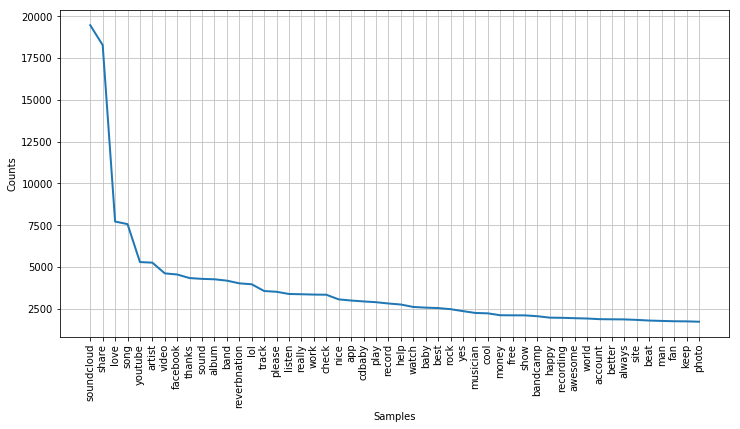

In [43]:
plt.figure(figsize=(12,6))
fdist_a.plot(50)

### What are the most popular words in comments?

In [79]:
fdist_a.most_common(50)

[('soundcloud', 19466),
 ('share', 18276),
 ('love', 7724),
 ('song', 7569),
 ('youtube', 5300),
 ('artist', 5264),
 ('video', 4623),
 ('facebook', 4555),
 ('thanks', 4342),
 ('sound', 4294),
 ('album', 4269),
 ('band', 4188),
 ('reverbnation', 4027),
 ('lol', 3970),
 ('track', 3567),
 ('please', 3522),
 ('listen', 3390),
 ('really', 3375),
 ('work', 3355),
 ('check', 3346),
 ('nice', 3067),
 ('app', 2999),
 ('cdbaby', 2945),
 ('play', 2899),
 ('record', 2821),
 ('help', 2760),
 ('watch', 2614),
 ('baby', 2574),
 ('best', 2548),
 ('rock', 2482),
 ('yes', 2365),
 ('musician', 2256),
 ('cool', 2232),
 ('money', 2119),
 ('free', 2114),
 ('show', 2111),
 ('bandcamp', 2059),
 ('happy', 1974),
 ('recording', 1965),
 ('awesome', 1942),
 ('world', 1923),
 ('account', 1884),
 ('better', 1876),
 ('always', 1870),
 ('site', 1840),
 ('beat', 1801),
 ('man', 1779),
 ('fan', 1759),
 ('keep', 1753),
 ('photo', 1731)]

### Soundcloud appears to be the most talked about over the other four distributers

Let's look at pairs of words

In [45]:
# currently the data are in list ... convert to string
tokens = str(textc_clean)
#lowercases
tokens = tokens.lower()
# Remove useless numbers and alphanumerical words
tokens = re.sub("[^a-zA-Z0-9]", " ", tokens)
#tokenization or word split
tokens = word_tokenize(tokens)
#Remove stopwords
tokens = (word for word in tokens if word not in stopwords.words('english'))
# Filter non-alphanumeric characters from tokens
tokens = (word for word in tokens if word.isalpha())
#remove short words
tokens = (word for word in tokens if len(word) >= 3)

#Create your bigrams ... a bigram are a pair of two tokens
bigrams = nltk.bigrams(tokens)
#compute frequency distribution for all the bigrams in the text
fdist_biA = nltk.FreqDist(bigrams)
fdist_biA


FreqDist({('video', 'share'): 3094, ('share', 'soundcloud'): 2792, ('share', 'youtube'): 2271, ('youtube', 'watch'): 2135, ('soundcloud', 'soundcloud'): 1237, ('share', 'highlighted'): 1095, ('hip', 'hop'): 682, ('sound', 'cloud'): 639, ('soundcloud', 'user'): 621, ('happy', 'birthday'): 508, ...})

In [46]:
# Most popular bigram words for comments
fdist_biA.most_common(50)

[(('video', 'share'), 3094),
 (('share', 'soundcloud'), 2792),
 (('share', 'youtube'), 2271),
 (('youtube', 'watch'), 2135),
 (('soundcloud', 'soundcloud'), 1237),
 (('share', 'highlighted'), 1095),
 (('hip', 'hop'), 682),
 (('sound', 'cloud'), 639),
 (('soundcloud', 'user'), 621),
 (('happy', 'birthday'), 508),
 (('itunes', 'apple'), 453),
 (('apple', 'album'), 388),
 (('soundcloud', 'share'), 352),
 (('share', 'listen'), 337),
 (('help', 'soundcloud'), 333),
 (('black', 'white'), 323),
 (('bandcamp', 'album'), 302),
 (('smooth', 'criminal'), 289),
 (('share', 'facebook'), 289),
 (('wow', 'wow'), 273),
 (('love', 'love'), 273),
 (('billie', 'jean'), 272),
 (('pearl', 'jam'), 269),
 (('follow', 'soundcloud'), 267),
 (('love', 'soundcloud'), 264),
 (('youtube', 'soundcloud'), 259),
 (('rock', 'roll'), 258),
 (('hold', 'hand'), 257),
 (('earth', 'song'), 254),
 (('photo', 'php'), 253),
 (('php', 'fbid'), 243),
 (('facebook', 'photo'), 241),
 (('image', 'share'), 234),
 (('set', 'type'), 

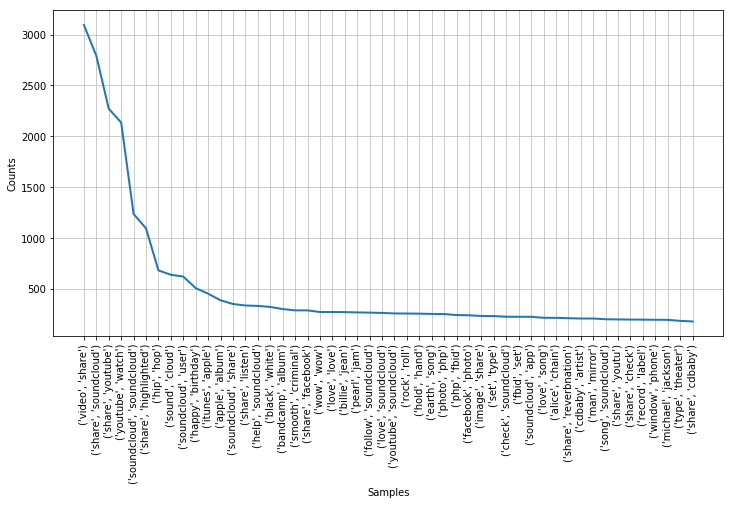

In [47]:
# plot word frequency using bigram
plt.figure(figsize=(12,6))
fdist_biA.plot(50)

### The most popular words are related to sharing video's, SoundCloud, watching  YouTube, ITunes, Apple, Facebook, and Michael Jackson songs

### Sentiment Analysis on Comments


In [48]:
from pattern.en import sentiment

In [49]:
# comments 
documents

['Victor ',
 'Need to pick this up',
 'Roy Ston',
 'I ll put that at the bottom of my must listen to list ',
 'Gabriel Berloffa',
 'Marcus Dunsford',
 'Nice will check these tunes later ',
 'Yeah ',
 'Still have those ones PHOTO ',
 'I haven t thought of Michelle Noel in years What fun',
 'Mar lia Pires',
 'Bianca Martin',
 'Nice She s awesome ',
 'Is that Corin from Sleater Kinney ',
 'Read much ',
 'Her before SK that is',
 'Jarrod Paul Bramson yeah I read the article after asking the question thanks ',
 'Donald William ',
 'Donald William ',
 'Lee Taylor',
 ' STICKER ',
 'Loves me some Shakey graves',
 'Jake Lamb',
 'That s a great band ',
 'WAKE ME UP INSIDE',
 'Thats all i clicked comments for',
 'Brendan Timmons same but it wasn t there for me Be the change you want in this world ',
 'Lucas Erskine',
 'Maya Sheryl Jeremy Rice ',
 'My two favorites ',
 'Mathieu Moon',
 'tu sais ben que mon vinyle est command depuis a mois et demi j ai hate demain ',
 'Marcus Dunsford',
 'Kobra Kai

In [50]:
# Sentiment analysis 
positive_comment = []
negative_comment = []
neutral_comment = []

for row in documents:
    comment = row[0]
    score = sentiment(comment)
    if score[0] > 0:
        positive_comment.append(comment)
    elif score[0] == 0:
        neutral_comment.append(comment)
    else:
        negative_comment.append(comment)

In [51]:
print len(positive_comment)
print len(negative_comment)
print len(neutral_comment)

0
0
200758


### Sentiment Analysis using Pattern did not pick up any positive or negative comments

### Network Analytics:  

##### The file, "Reverbnation.gdf" was generated from  Netvizz with a crawl depth of 1 for “Page Like Network”.  This file was imported into Gephi for analysis.


### Visualization of Network Graph from Gephi 

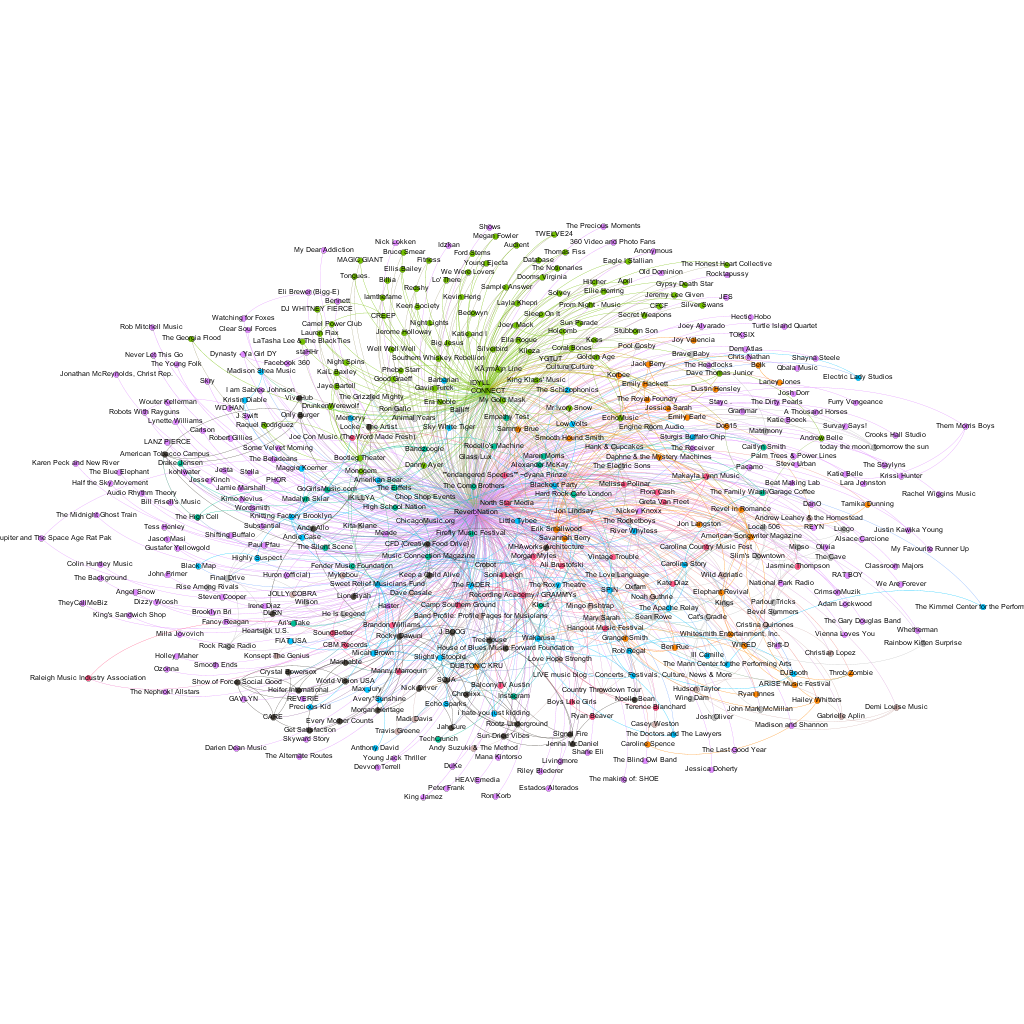

In [53]:
from IPython.display import Image
Image("reverbnation.png")

### Analysis of visualization

### Results  - node-level metrics 

- Summary: Major organizations, internal organizations, media, concerts, public figures are most important to Reverbnation.

Here are the calculations of statistics from Gephi:

A node with higher betweenness centrality has more control over the network because more information will pass through that node.    

The top six entities with the highest betweenness centrality and most important to Reverbnation and clearly in the graphic presentation are:
- ReverbNation showing as a musician
- Wakarusa (music fest)
- IDYLL CONNECT (associated with Reverbnation)
- SOJA (Band)
- Recording Academy (Grammy)
- Knitting Factory Brooklyn (bar)

‘Closeness Centrality’ is the average shortest distance to the rest of the network.  The largest value is '1'.  Other than Reverbnation and Klout (app page), the other entities with a '1' are musicians and bands.

Avg. Path Length is 2.98

Average Degree and Average Weighted Degreeis 2.554
The highest degree is 511, showing Reverbnation at the top. 

The highest weighted degree shows Reverbnation and Idyll Connect on top. 
 
Graph Density .006 (not dense)

Clustering Coefficient .399 
This is a measure of how connected each character’s neighbors are connected to one another. 
This appears to be below the high clustering coefficient score of 1.0. Business connections were not very complete.

Groups with the largest fan-count: Instagram, Mashable (a media news company) and Milla Jovovich (public figure) round up the top.

Eigenvector Centrality - Number of iterations: 100 Sum change:  0.004906846882302904 (relatively low)
A high eigenvector score means that a node is connected to many nodes that also have high scores. A connection to a popular node means higher popularity. That may not be the case here.

Subgroup network visualization through modularity analysis shows the following breakdown.
Modularity: 0.372
Modularity with resolution: 0.372
Number of Communities: 13


# Twitter results



## Data Cleaning & Text Preprocessing for Twitter

In [61]:
# import text data (csv) as a dataframe

import pandas as pd

dftw = pd.read_csv("tweets_streaming.csv")
dftw = dftw.where((pd.notnull(dftw)), None)
dftw.head(2)

,id,created at,text,screen name,name,lat,lon,place name,place type
0,993597484072161280,Mon May 07 21:04:35 +0000 2018,RT @Norbert_Loose: When the passion comes up.....,Norbert_Loose,Norbert Szabo,None,None,None,None
1,993597485003161600,Mon May 07 21:04:35 +0000 2018,RT @ShaunKing: FURIOUS!\r\n\r\nNeighbors calle...,MigiSmallss,MigiSmalls,None,None,None,None


In [62]:
dftw['text'].str.lower()

0        rt @norbert_loose: when the passion comes up.....
1        rt @shaunking: furious!\r\n\r\nneighbors calle...
2        rt @jaumealonsocuev: has vist el vídeo que ha ...
3        rt @abigio2: este debe ser el music video de a...
4        rt @rwapmon: this guy is saying that if your i...
5        rt @florianecaetano: sachant qu'un euro équiva...
6        rt @lacerda: sinceramente cansei de tudo eu vo...
7        rt @personsisaiah: death riding the pale white...
8        thanks to @stalbansabbey and @primebrass for t...
9                @lolozouai concert tonight! beyond amped!
10       donald glover shoots church choir in political...
11       rt @quadfader: this is literally what new musi...
12       rt @thomassanders: music streaming struggles �...
13       hier j'ai revé quon refaisait la finale du bas...
14       indeed. (via @hamillhimself ) https://t.co/6pk...
15       rt @byunsults: he randomly started to dance to...
16       rt @imjungshook: we’re getting the last episod.

In [63]:
# you can update the values

dftw['text'] = dftw['text'].str.lower()
dftw.head()

,id,created at,text,screen name,name,lat,lon,place name,place type
0,993597484072161280,Mon May 07 21:04:35 +0000 2018,rt @norbert_loose: when the passion comes up.....,Norbert_Loose,Norbert Szabo,None,None,None,None
1,993597485003161600,Mon May 07 21:04:35 +0000 2018,rt @shaunking: furious!\r\n\r\nneighbors calle...,MigiSmallss,MigiSmalls,None,None,None,None
2,993597484839645187,Mon May 07 21:04:35 +0000 2018,rt @jaumealonsocuev: has vist el vídeo que ha ...,nuriallibertatc,Núria,None,None,None,None
3,993597485238059016,Mon May 07 21:04:35 +0000 2018,rt @abigio2: este debe ser el music video de a...,_fabiolaadaliz,fabz🖤,None,None,None,None
4,993597485644963840,Mon May 07 21:04:35 +0000 2018,rt @rwapmon: this guy is saying that if your i...,rwapmon,LY:Tear,None,None,None,None


In [64]:
# update counts
dftw['counts'] = dftw['text'].str.len()
dftw.head(2)

,id,created at,text,screen name,name,lat,lon,place name,place type,counts
0,993597484072161280,Mon May 07 21:04:35 +0000 2018,rt @norbert_loose: when the passion comes up.....,Norbert_Loose,Norbert Szabo,None,None,None,None,147
1,993597485003161600,Mon May 07 21:04:35 +0000 2018,rt @shaunking: furious!\r\n\r\nneighbors calle...,MigiSmallss,MigiSmalls,None,None,None,None,146


In [65]:
dftw['text'].str.split()

0        [rt, @norbert_loose:, when, the, passion, come...
1        [rt, @shaunking:, furious!, neighbors, called,...
2        [rt, @jaumealonsocuev:, has, vist, el, vídeo, ...
3        [rt, @abigio2:, este, debe, ser, el, music, vi...
4        [rt, @rwapmon:, this, guy, is, saying, that, i...
5        [rt, @florianecaetano:, sachant, qu'un, euro, ...
6        [rt, @lacerda:, sinceramente, cansei, de, tudo...
7        [rt, @personsisaiah:, death, riding, the, pale...
8        [thanks, to, @stalbansabbey, and, @primebrass,...
9          [@lolozouai, concert, tonight!, beyond, amped!]
10       [donald, glover, shoots, church, choir, in, po...
11       [rt, @quadfader:, this, is, literally, what, n...
12       [rt, @thomassanders:, music, streaming, strugg...
13       [hier, j'ai, revé, quon, refaisait, la, finale...
14       [indeed., (via, @hamillhimself, ), https://t.c...
15       [rt, @byunsults:, he, randomly, started, to, d...
16       [rt, @imjungshook:, we’re, getting, the, last,.

In [66]:
# which tweets contain the hashtag #Soundcloud? It appears to be hip hop beats, dj's, Indie type groups, rock, radio

soundcloud = dftw.text.str.contains("#soundcloud")
dftw[soundcloud]

,id,created at,text,screen name,name,lat,lon,place name,place type,counts
45,993597497485545472,Mon May 07 21:04:38 +0000 2018,independent minded #podcast 69 with nyc indie ...,BaldFreakMusic,Ronnie Scalzo,None,None,None,None,129
365,993597616834469888,Mon May 07 21:05:06 +0000 2018,have you heard ‘greybeards interview’ by the ...,TheMetalGods1,Metal Gods Meltdown,None,None,None,None,114
516,993597671263883265,Mon May 07 21:05:19 +0000 2018,have you heard ‘doomsday outlaw interview’ by ...,TheMetalGods1,Metal Gods Meltdown,None,None,None,None,119
699,993597730114162688,Mon May 07 21:05:33 +0000 2018,have you heard ‘stormzone interview with harv ...,TheMetalGods1,Metal Gods Meltdown,None,None,None,None,133
847,993597781595115525,Mon May 07 21:05:45 +0000 2018,have you heard ‘the rocket dolls interview wit...,TheMetalGods1,Metal Gods Meltdown,None,None,None,None,141
13302,993603020498898945,Mon May 07 21:26:34 +0000 2018,#hiphop #music #rapper #love #beats #soundclo...,callmegado,mistahrenegade,None,None,None,None,135
19535,993605195270471680,Mon May 07 21:35:13 +0000 2018,rt @johnnywordmusic: “u knoo” now available on...,JohnnyWordMusic,Johnny Word 💨💨🚀🌊,None,None,None,None,145
21648,993606040863195136,Mon May 07 21:38:35 +0000 2018,the jazz dinger w/ amir from the red rowdies’ ...,houstonRocksIt,Houston Rocks It,None,None,None,None,140
22192,993606267506577409,Mon May 07 21:39:29 +0000 2018,perfume/if you wanna live https://t.co/ieivqyl...,hiroktk,hiro,None,None,None,None,138
22973,993606586303004674,Mon May 07 21:40:45 +0000 2018,"#tbh i wanna get fucked up rn, but in the mean...",luccidarapgod,Lucci,None,None,None,None,134


In [67]:
# which tweets contain the hashtag #tunecore which did not bring up anything.

tunecore = dftw.text.str.contains("#tunecore")
dftw[tunecore]

,id,created at,text,screen name,name,lat,lon,place name,place type,counts


In [68]:
#reverbnation pulls a music video requst for a country artist
reverbnation = dftw.text.str.contains("#reverbnation")
dftw[reverbnation]

,id,created at,text,screen name,name,lat,lon,place name,place type,counts
28885,993608922178162688,Mon May 07 21:50:02 +0000 2018,music video request: seeking #country artist w...,sixmicfilms,Sixmic Films,None,None,None,None,136


In [69]:
#cdbaby pulls up an indie type group
cdbaby = dftw.text.str.contains("#cdbaby")
dftw[cdbaby]

,id,created at,text,screen name,name,lat,lon,place name,place type,counts
737,993597742801870848,Mon May 07 21:05:36 +0000 2018,mind-healing music. plz rt.\r\n#itunes #amazon...,cearfeb,Cear,None,None,None,None,120


In [70]:
#bandcamp does not pull up anything on twitter
bandcamp = dftw.text.str.contains("#bandcamp")
dftw[bandcamp]

,id,created at,text,screen name,name,lat,lon,place name,place type,counts


In [71]:
#indie is mentioned in a several tweets
indie = dftw.text.str.contains("#indie")
dftw[indie]

,id,created at,text,screen name,name,lat,lon,place name,place type,counts
0,993597484072161280,Mon May 07 21:04:35 +0000 2018,rt @norbert_loose: when the passion comes up.....,Norbert_Loose,Norbert Szabo,None,None,None,None,147
45,993597497485545472,Mon May 07 21:04:38 +0000 2018,independent minded #podcast 69 with nyc indie ...,BaldFreakMusic,Ronnie Scalzo,None,None,None,None,129
58,993597501235220485,Mon May 07 21:04:39 +0000 2018,rt @momopistudio: persephone got selected to t...,Ibex_Games,Ibex Games,None,None,None,None,143
102,993597519685812224,Mon May 07 21:04:43 +0000 2018,promote your #rap #music &amp; #musicvideo's o...,Beatsta_,BEATSTA.com,None,None,None,None,128
421,993597637294284803,Mon May 07 21:05:11 +0000 2018,rt @officialj6music: https://t.co/6rw9a1eboy\r...,HelMontrose,Helen Montrose,None,None,None,None,144
573,993597689911828481,Mon May 07 21:05:24 +0000 2018,the dunwells - i could be a king https://t.co/...,WNRM,WNRM The Root,None,None,None,None,85
1053,993597862213836800,Mon May 07 21:06:05 +0000 2018,rt @momopistudio: persephone got selected to t...,MyriamAssuncao,Myriam Assuncao,None,None,None,None,143
1065,993597869549551616,Mon May 07 21:06:06 +0000 2018,#dancing with the moon and the werewolf https:...,nochehombrelobo,Lanochedelhombrelobo,None,None,None,None,126
1264,993597944313139201,Mon May 07 21:06:24 +0000 2018,"rt @frostiemoss: author, this will save you mo...",Lawfabex,Leisl Kaberry,None,None,None,None,127
1683,993598083836637191,Mon May 07 21:06:58 +0000 2018,indie dev sharer we hope you join us at portia...,MTaP_BOT,MyTimeatPortia BOT,None,None,None,None,86


In [72]:
#indiemusic is mentioned in a couple of tweets
indiemusic = dftw.text.str.contains("#indiemusic")
dftw[indiemusic]

,id,created at,text,screen name,name,lat,lon,place name,place type,counts
45,993597497485545472,Mon May 07 21:04:38 +0000 2018,independent minded #podcast 69 with nyc indie ...,BaldFreakMusic,Ronnie Scalzo,None,None,None,None,129
421,993597637294284803,Mon May 07 21:05:11 +0000 2018,rt @officialj6music: https://t.co/6rw9a1eboy\r...,HelMontrose,Helen Montrose,None,None,None,None,144


## Final analysis & storytelling 

The digital distribution music companies are a large source of music distribution which depends on social media for promotion. Entities such as Soundcloud are mentioned a great deal and appears many artists are associated with them, may be a reason to look at their services. 

CD Baby is more popular than TuneCore based on Fan metrics. Entities such as Reverbnation are networked with news media, promoters and associations with the grammy's and could be a source of exposure for those external groups, however, the largest network appears to be within it's own organization which could be limiting to a musician or artist. 

With YouTube and that many like to watch videos as much as listen to music, video production is as important as audio.  Recording studios still are relevant. Genres such as Rap and Hip Hop are mentioned a lot and may be a focus for recruiting business. That genre uses 'beats' which can be recorded and marketed. The same can be said about Indie music. Bandcamp is mentioned a lot in the facebook statuses but no tweets.  

The recommedation is to utilize the distributor that fits your needs for exposure. Keep an open mind to diverse selection of genres and that hip hop and Indie type music has a greater appeal. Playlists products are increasing in popularity.

Based on the findings, the most popular and effective type of distribution is with a company that provides the most services for the artist depending on their career goals.  

The use of social media, such as Facebook and Twitter is essential in marketing music and video.



# Appendix: PY Files

### Fanpage.py

### Getcomments.py

### Digital_tweets.py